In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
# Import the datasets

dfHistorical = pd.read_csv('historical-mvps.csv')
dfCombined = pd.read_csv('combined-mvps.csv')

In [3]:
# Preview the historical dataset

dfHistorical.head()

Rank               Player  Age   Tm  Pts Won  Pts Max  Share     G  \
0     1  Kareem Abdul-Jabbar   32  LAL    147.0      221  0.665  82.0   
1     2        Julius Erving   29  PHI     31.5      221  0.143  78.0   
2     3        George Gervin   27  SAS     19.0      221  0.086  78.0   
3     4           Larry Bird   23  BOS     15.0      221  0.068  82.0   
4     5       Tiny Archibald   31  BOS      2.0      221  0.009  80.0   

   Team Wins  Overall Seed      ...         3P%    FT%    WS  WS/48  VORP  \
0       60.0             2      ...       0.000  0.765  14.8  0.227   6.8   
1       59.0             3      ...       0.200  0.787  12.5  0.213   6.5   
2       41.0            10      ...       0.314  0.852  10.6  0.173   3.1   
3       61.0             1      ...       0.406  0.836  11.2  0.182   5.4   
4       61.0             1      ...       0.222  0.830   8.9  0.148   1.5   

   BPM  G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0  6.7        NaN           NaN         NaN           NaN  
1  7.2        NaN           NaN         NaN           NaN  
2  2.2        NaN           NaN         NaN           NaN  
3  5.3        NaN           NaN         NaN           NaN  
4  0.0        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

# Correlation between wins and MVP vote share 

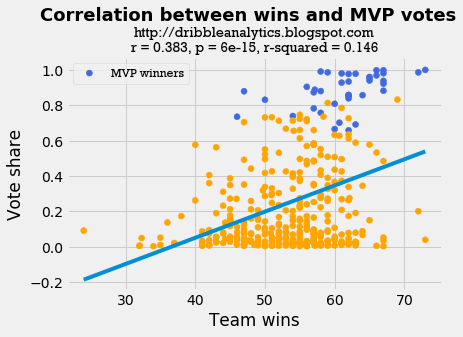

In [4]:
plt.style.use('fivethirtyeight')
 
wins, ax = plt.subplots()

colorList = []

for index, row in dfCombined.iterrows():
    if row['Rank'] == 1:
        colorList.append('royalblue')
    else:
        colorList.append('orange')

ax.scatter(dfCombined['Team Wins'], dfCombined['Share'], color = colorList, label = "MVP winners")
wins.suptitle("Correlation between wins and MVP votes", weight = 'bold', size = 18, y = 1.055)
ax.set_xlabel("Team wins")
ax.set_ylabel("Vote share")
 
ax.plot(np.unique(dfCombined['Team Wins']), np.poly1d(np.polyfit(dfCombined['Team Wins'], dfCombined['Share'], 1))
       (np.unique(dfCombined['Team Wins'])))

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCombined['Team Wins'], dfCombined['Share'])

rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 15)) + ", r-squared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com\n%s"%rpString, size = 14, fontname = 'Rockwell')

wins.savefig('wins-correl.png', dpi = 400, bbox_inches = 'tight')

# Correlation between points and MVP vote share 

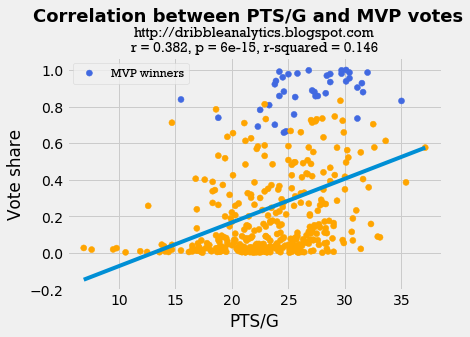

In [5]:
plt.style.use('fivethirtyeight')
 
pts, ax = plt.subplots()

colorList = []

for index, row in dfCombined.iterrows():
    if row['Rank'] == 1:
        colorList.append('royalblue')
    else:
        colorList.append('orange')

ax.scatter(dfCombined['PTS'], dfCombined['Share'], color = colorList, label = "MVP winners")
pts.suptitle("Correlation between PTS/G and MVP votes", weight = 'bold', size = 18, y = 1.055)
ax.set_xlabel("PTS/G")
ax.set_ylabel("Vote share")
 
ax.plot(np.unique(dfCombined['PTS']), np.poly1d(np.polyfit(dfCombined['PTS'], dfCombined['Share'], 1))
       (np.unique(dfCombined['PTS'])))

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCombined['PTS'], dfCombined['Share'])

rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 15)) + ", r-squared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com\n%s"%rpString, size = 14, fontname = 'Rockwell')

pts.savefig('pts-correl.png', dpi = 400, bbox_inches = 'tight')

# Correlation between VORP and MVP vote share 

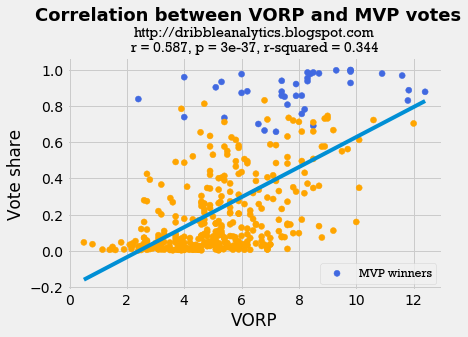

In [6]:
plt.style.use('fivethirtyeight')
 
vorp, ax = plt.subplots()

colorList = []

for index, row in dfCombined.iterrows():
    if row['Rank'] == 1:
        colorList.append('royalblue')
    else:
        colorList.append('orange')

ax.scatter(dfCombined['VORP'], dfCombined['Share'], color = colorList, label = "MVP winners")
vorp.suptitle("Correlation between VORP and MVP votes", weight = 'bold', size = 18, y = 1.055)
ax.set_xlabel("VORP")
ax.set_ylabel("Vote share")
 
ax.plot(np.unique(dfCombined['VORP']), np.poly1d(np.polyfit(dfCombined['VORP'], dfCombined['Share'], 1))
       (np.unique(dfCombined['VORP'])))

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCombined['VORP'], dfCombined['Share'])

rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str('{:.0g}'.format(p_value)) + ", r-squared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com\n%s"%rpString, size = 14, fontname = 'Rockwell')

vorp.savefig('vorp-correl.png', dpi = 400, bbox_inches = 'tight')

# Correlation between BPM and MVP vote share 

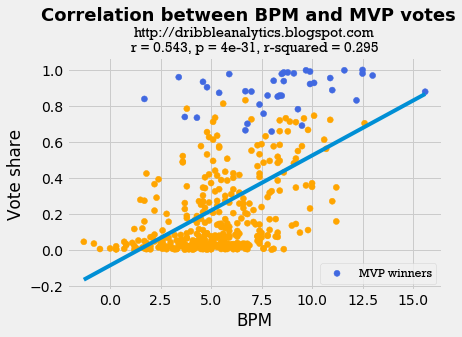

In [7]:
plt.style.use('fivethirtyeight')
 
bpm, ax = plt.subplots()

colorList = []

for index, row in dfCombined.iterrows():
    if row['Rank'] == 1:
        colorList.append('royalblue')
    else:
        colorList.append('orange')

ax.scatter(dfCombined['BPM'], dfCombined['Share'], color = colorList, label = "MVP winners")
bpm.suptitle("Correlation between BPM and MVP votes", weight = 'bold', size = 18, y = 1.055)
ax.set_xlabel("BPM")
ax.set_ylabel("Vote share")
 
ax.plot(np.unique(dfCombined['BPM']), np.poly1d(np.polyfit(dfCombined['BPM'], dfCombined['Share'], 1))
       (np.unique(dfCombined['BPM'])))

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCombined['BPM'], dfCombined['Share'])

rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 31)) + ", r-squared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com\n%s"%rpString, size = 14, fontname = 'Rockwell')

bpm.savefig('bpm-correl.png', dpi = 400, bbox_inches = 'tight')

# Create models

In [8]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 9)

xtrain = train[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]
ytrain = train[['Share']]

xtest = test[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'VORP', 'BPM']]
ytest = test[['Share']]

In [9]:
svr = SVR(kernel='rbf', gamma=1e-4, C=10, epsilon = .001)
svr.fit(xtrain, ytrain.values.ravel())

y_svr = svr.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_svr))
print('R2 score: %.3f' % r2_score(ytest, y_svr))

cvScoreSVR = cross_val_score(svr, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreSVR.mean(), cvScoreSVR.std() * 2))

Mean squared error: 0.028
R2 score: 0.669
Accuracy (cross validation score): 0.50 (+/- 0.25)


In [10]:
rf = RandomForestRegressor(random_state = 999, n_estimators = 100, criterion = 'mse')
rfPred = rf.fit(xtrain, ytrain.values.ravel())
y_rf = rfPred.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rf))
print('R2 score: %.3f' % r2_score(ytest, y_rf))

cvScoreRF = cross_val_score(rf, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRF.mean(), cvScoreRF.std() * 2))

Mean squared error: 0.032
R2 score: 0.618
Accuracy (cross validation score): 0.51 (+/- 0.20)


In [11]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'uniform')
knn.fit(xtrain, ytrain)

y_knn = knn.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_knn))
print('R2 score: %.3f' % r2_score(ytest, y_knn))

cvScoreKNN = cross_val_score(knn, xtest, ytest, cv = 3, scoring = 'r2')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreKNN.mean(), cvScoreKNN.std() * 2))

Mean squared error: 0.032
R2 score: 0.612
Accuracy (cross validation score): 0.42 (+/- 0.21)


In [12]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=987654321,
    activation='identity',
    learning_rate = 'invscaling')

dnn.fit(xtrain, ytrain.values.ravel())

y_dnn = dnn.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_dnn))
print('R2 score: %.3f' % r2_score(ytest, y_dnn))

cvScoreDNN = cross_val_score(dnn, xtest, ytest, cv = 3, scoring = 'r2')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreDNN.mean(), cvScoreDNN.std() * 2))

Mean squared error: 0.029
R2 score: 0.649


C:\Users\tboge\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tboge\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tboge\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (cross validation score): 0.36 (+/- 0.38)


# Standardized residuals test

In [13]:
svrResid = ytest['Share'] - y_svr

svrList = []
for i in svrResid.values:
    svrList.append(i)
    
ssr = []
for i in svrList:
    ssr.append(i ** 2)
    
ssrSum = 0
for i in ssr:
    ssrSum += i

svrResidList = []
for i in svrList:
    svrResidList.append(i / ((ssrSum / 68) ** (1/2)))
    
rfResid = ytest['Share'] - y_rf

rfList = []
for i in rfResid.values:
    rfList.append(i)
    
ssr = []
for i in rfList:
    ssr.append(i ** 2)
    
ssrSum = 0
for i in ssr:
    ssrSum += i

rfResidList = []
for i in rfList:
    rfResidList.append(i / ((ssrSum / 68) ** (1/2)))
    
knnResid = ytest.subtract(y_knn)

knnList = []
for i in knnResid.values:
    knnList.append(i)

ssr = []
for i in knnList:
    ssr.append(i ** 2)

ssrSum = 0
for i in ssr:
    ssrSum += i

knnResidList = []
for i in knnList:
    knnResidList.append(i / ((ssrSum / 68) ** (1/2))) 
    
dnnResid = ytest['Share'] - y_dnn

dnnList = []
for i in dnnResid.values:
    dnnList.append(i)
    
ssr = []
for i in dnnList:
    ssr.append(i ** 2)
    
ssrSum = 0
for i in ssr:
    ssrSum += i

dnnResidList = []
for i in dnnList:
    dnnResidList.append(i / ((ssrSum / 68) ** (1/2)))

In [14]:
npList = np.array(svrResidList)
stdSVR = np.std(npList)
meanSVR = np.mean(npList)

outliers = 0
for i in svrResidList:
    if i < meanSVR - 2 * stdSVR:
        outliers += 1
    elif i > meanSVR + 2 * stdSVR:
        outliers += 1
        
outlierPerc = outliers / 70
distPerc = 1 - outlierPerc
distStringSVR = "{:.3%}".format(distPerc)

npList = np.array(rfResidList)
stdRF = np.std(npList)
meanRF = np.mean(npList)

outliers = 0
for i in rfResidList:
    if i < meanRF - 2 * stdRF:
        outliers += 1
    elif i > meanRF + 2 * stdRF:
        outliers += 1
        
outlierPerc = outliers / 70
distPerc = 1 - outlierPerc
distStringRF = "{:.3%}".format(distPerc)

npList = np.array(knnResidList)
stdKNN = np.std(npList)
meanKNN = np.mean(npList)

outliers = 0
for i in knnResidList:
    if i < meanKNN - 2 * stdKNN:
        outliers += 1
    elif i > meanKNN + 2 * stdKNN:
        outliers += 1
        
outlierPerc = outliers / 70
distPerc = 1 - outlierPerc
distStringKNN = "{:.3%}".format(distPerc)

npList = np.array(dnnResidList)
stdDNN = np.std(npList)
meanDNN = np.mean(npList)

outliers = 0
for i in dnnResidList:
    if i < meanDNN - 2 * stdDNN:
        outliers += 1
    elif i > meanDNN + 2 * stdDNN:
        outliers += 1
        
outlierPerc = outliers / 70
distPerc = 1 - outlierPerc
distStringDNN = "{:.3%}".format(distPerc)

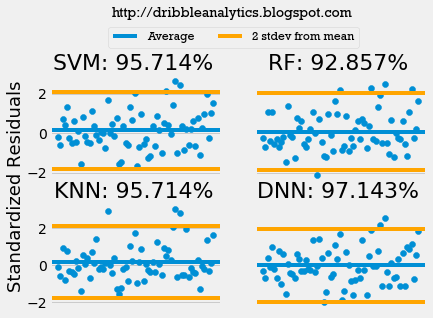

In [15]:
plt.style.use('fivethirtyeight')

residFig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = 'row')

x = np.arange(70)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

ax1.scatter(x, svrResidList)
ax1.axhline(y = meanSVR, label = "Average")
ax1.axhline(y = meanSVR - 2 * stdSVR, color = 'orange')
ax1.axhline(y = meanSVR + 2 * stdSVR, label = "2 stdev from mean", color = 'orange')
ax1.set_title("SVM: %s" % distStringSVR, size = 22, x = .485, ha = 'center')

ax2.scatter(x, rfResidList)
ax2.axhline(y = meanRF)
ax2.axhline(y = meanRF - 2 * stdRF, color = 'orange')
ax2.axhline(y = meanRF + 2 * stdRF, color = 'orange')
ax2.set_title("RF: %s" % distStringRF, size = 22, x = .485, ha = 'center')

ax3.scatter(x, knnResidList)
ax3.axhline(y = meanKNN)
ax3.axhline(y = meanKNN - 2 * stdKNN, color = 'orange')
ax3.axhline(y = meanKNN + 2 * stdKNN, color = 'orange')
ax3.set_title("KNN: %s" % distStringKNN, size = 22, x = .485, ha = 'center')

ax4.scatter(x, dnnResidList)
ax4.axhline(y = meanDNN)
ax4.axhline(y = meanDNN - 2 * stdDNN, color = 'orange')
ax4.axhline(y = meanDNN + 2 * stdDNN, color = 'orange')
ax4.set_title("DNN: %s" % distStringDNN, size = 22, x = .485, ha = 'center')

residFig.legend(loc = (.25, .85), ncol=2, prop={'size': 12, "family": "Rockwell"})
residFig.text(-0.02, 0.5, "Standardized Residuals", va='center', rotation='vertical', size = 18)

residFig.suptitle("http://dribbleanalytics.blogspot.com", y = 1.12, fontname = 'Rockwell', size = 14)

residFig.savefig('resid-fig.png', dpi = 400, bbox_inches = 'tight')

# Q-Q plot

In [16]:
newKnnList = []

for i in knnResidList:
    newKnnList.append(i[0])

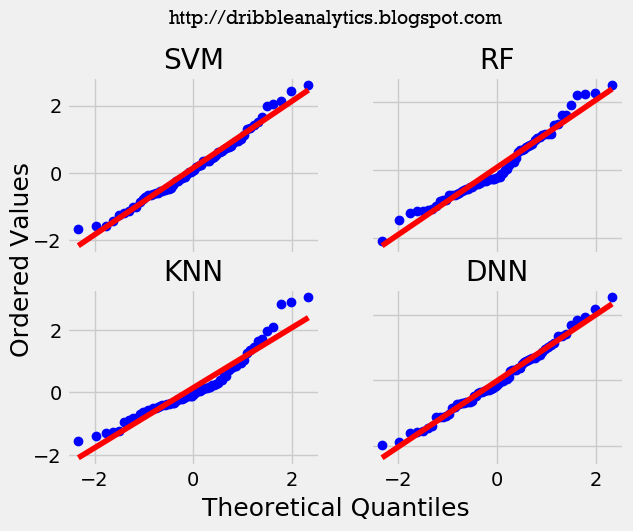

In [17]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('fivethirtyeight')

import scipy.stats as stats

qqplot = plt.figure()

ax1 = qqplot.add_subplot(221)
stats.probplot(svrResidList, dist="norm", plot=plt)
ax1.set_xlabel("")
ax1.set_xticklabels([])
ax1.set_ylabel("")
ax1.set_title("SVM")

ax2 = qqplot.add_subplot(222)
stats.probplot(rfResidList, dist="norm", plot=plt)
ax2.set_xlabel("")
ax2.set_xticklabels([])
ax2.set_ylabel("")
ax2.set_title("RF")
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = qqplot.add_subplot(223)
stats.probplot(newKnnList, dist="norm", plot=plt)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("KNN")

ylim = ax3.get_ylim()

ax4 = qqplot.add_subplot(224)
stats.probplot(dnnResidList, dist = "norm", plot = plt)
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.set_title("DNN")
ax4.set_yticklabels([])

qqplot.text(0.5, -0.02, 'Theoretical Quantiles', ha='center', va='center', size = 18)
qqplot.text(0.01, 0.5, 'Ordered Values', ha='center', va='center', rotation='vertical', size = 18)

qqplot.suptitle("http://dribbleanalytics.blogspot.com", y = 1.02, fontname = 'Rockwell', size = 14)

qqplot.savefig('qqplot.png', dpi = 400, bbox_inches = 'tight')

# Shapiro-Wilk test

In [18]:
from scipy.stats import shapiro

print(shapiro(svrResidList))
print(shapiro(rfResidList))
print(shapiro(knnResidList))
print(shapiro(dnnResidList))

(0.9809666275978088, 0.36531388759613037)
(0.9623075127601624, 0.03361492231488228)
(0.9243288040161133, 0.0004103640385437757)
(0.9867334365844727, 0.6702622175216675)


# Durbin-Watson test 

In [19]:
from statsmodels.stats import stattools as stools

print(stools.durbin_watson(svrResidList))
print(stools.durbin_watson(rfResidList))
print(stools.durbin_watson(knnResidList))
print(stools.durbin_watson(dnnResidList))

2.0367077688050617
2.132784986505824
[2.03670889]
2.1464240049496754


# Learning curve for MSE

In [20]:
from sklearn.model_selection import learning_curve

train_sizes = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 184]


features = ['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']
target = 'Share'

train_sizesSVR, train_scoresSVR, validation_scoresSVR = learning_curve(estimator = SVR(
    kernel='rbf', gamma=1e-4, C=10, epsilon = .001),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'neg_mean_squared_error')

In [21]:
train_sizesRF, train_scoresRF, validation_scoresRF = learning_curve(estimator = RandomForestRegressor(
    random_state = 999, n_estimators = 100, criterion = 'mse'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'neg_mean_squared_error')

In [22]:
train_sizes1 = [6, 20, 40, 60, 80, 100, 120, 140, 160, 180, 184]

train_sizesKNN, train_scoresKNN, validation_scoresKNN = learning_curve(estimator = neighbors.KNeighborsRegressor(
    n_neighbors = 6, weights = 'uniform'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes1, cv = 3,
    scoring = 'neg_mean_squared_error')

In [23]:
train_sizesDNN, train_scoresDNN, validation_scoresDNN = learning_curve(estimator = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=987654321,
    activation='identity',
    learning_rate = 'invscaling'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'neg_mean_squared_error')

In [24]:
train_scores_meanSVR = -train_scoresSVR.mean(axis = 1)
validation_scores_meanSVR = -validation_scoresSVR.mean(axis = 1)

train_scores_meanRF = -train_scoresRF.mean(axis = 1)
validation_scores_meanRF = -validation_scoresRF.mean(axis = 1)

train_scores_meanKNN = -train_scoresKNN.mean(axis = 1)
validation_scores_meanKNN = -validation_scoresKNN.mean(axis = 1)

train_scores_meanDNN = -train_scoresDNN.mean(axis = 1)
validation_scores_meanDNN = -validation_scoresDNN.mean(axis = 1)

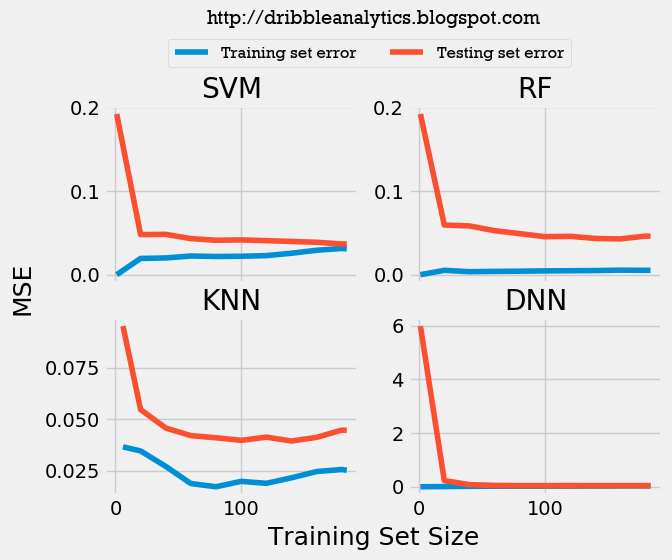

In [25]:
plt.style.use('fivethirtyeight')

learningCurveMSE, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

ax1.plot(train_sizesSVR, train_scores_meanSVR, label = 'Training set error')
ax1.plot(train_sizesSVR, validation_scores_meanSVR, label = 'Testing set error')
ax1.set_title("SVM")

ax2.plot(train_sizesRF, train_scores_meanRF)
ax2.plot(train_sizesRF, validation_scores_meanRF)
ax2.set_title("RF")

ax3.plot(train_sizesKNN, train_scores_meanKNN)
ax3.plot(train_sizesKNN, validation_scores_meanKNN)
ax3.set_title("KNN")

ax4.plot(train_sizesDNN, train_scores_meanDNN)
ax4.plot(train_sizesDNN, validation_scores_meanDNN)
ax4.set_title("DNN")

learningCurveMSE.legend(loc = (.25, .88), ncol=2, prop={'size': 12, "family": "Rockwell"})
learningCurveMSE.text(0.5, -0.02, 'Training Set Size', ha='center', va='center', size = 18)
learningCurveMSE.text(-0.05, 0.5, 'MSE', ha='center', va='center', rotation='vertical', size = 18)

learningCurveMSE.suptitle("http://dribbleanalytics.blogspot.com", y = 1.08, fontname = 'Rockwell', size = 14)

learningCurveMSE.savefig('learningCurveMSE.png', dpi = 400, bbox_inches = 'tight')

# Learning curve for R2

In [26]:
from sklearn.model_selection import learning_curve

train_sizes = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 184]

features = ['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']
target = 'Share'

train_sizesSVR, train_scoresSVR, validation_scoresSVR = learning_curve(estimator = SVR(
    kernel='rbf', gamma=1e-4, C=10, epsilon = .001),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'r2')

In [27]:
train_sizesRF, train_scoresRF, validation_scoresRF = learning_curve(estimator = RandomForestRegressor(
    random_state = 999, n_estimators = 100, criterion = 'mse'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'r2')

In [28]:
train_sizes1 = [6, 20, 40, 60, 80, 100, 120, 140, 160, 180, 184]

train_sizesKNN, train_scoresKNN, validation_scoresKNN = learning_curve(estimator = neighbors.KNeighborsRegressor(
    n_neighbors = 6, weights = 'uniform'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes1, cv = 3,
    scoring = 'r2')

In [29]:
train_sizesDNN, train_scoresDNN, validation_scoresDNN = learning_curve(estimator = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=987654321,
    activation='identity',
    learning_rate = 'invscaling'),
    X = dfHistorical[features], y = dfHistorical[target], train_sizes = train_sizes, cv = 3,
    scoring = 'r2')

In [30]:
train_scores_meanSVR = train_scoresSVR.mean(axis = 1)
validation_scores_meanSVR = validation_scoresSVR.mean(axis = 1)

train_scores_meanRF = train_scoresRF.mean(axis = 1)
validation_scores_meanRF = validation_scoresRF.mean(axis = 1)

train_scores_meanKNN = train_scoresKNN.mean(axis = 1)
validation_scores_meanKNN = validation_scoresKNN.mean(axis = 1)

train_scores_meanDNN = train_scoresDNN.mean(axis = 1)
validation_scores_meanDNN = validation_scoresDNN.mean(axis = 1)

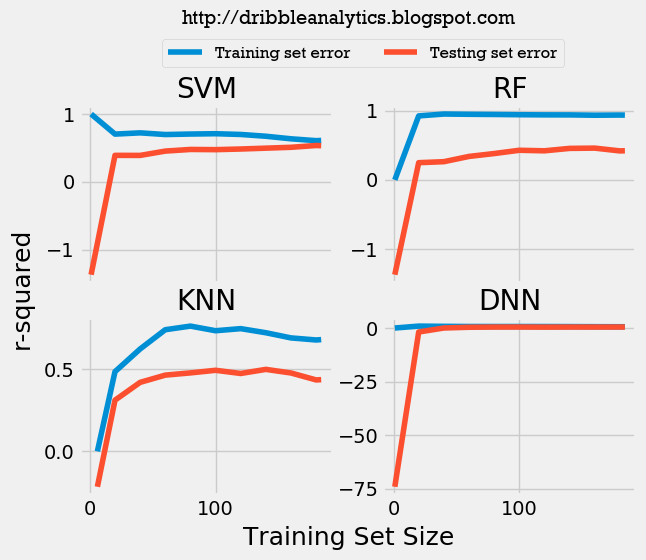

In [31]:
plt.style.use('fivethirtyeight')

learningCurveR2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

ax1.plot(train_sizesSVR, train_scores_meanSVR, label = 'Training set error')
ax1.plot(train_sizesSVR, validation_scores_meanSVR, label = 'Testing set error')
ax1.set_title("SVM")

ax2.plot(train_sizesRF, train_scores_meanRF)
ax2.plot(train_sizesRF, validation_scores_meanRF)
ax2.set_title("RF")

ax3.plot(train_sizesKNN, train_scores_meanKNN)
ax3.plot(train_sizesKNN, validation_scores_meanKNN)
ax3.set_title("KNN")

ax4.plot(train_sizesDNN, train_scores_meanDNN)
ax4.plot(train_sizesDNN, validation_scores_meanDNN)
ax4.set_title("DNN")

learningCurveR2.legend(loc = (.25, .88), ncol=2, prop={'size': 12, "family": "Rockwell"})
learningCurveR2.text(0.5, -0.02, 'Training Set Size', ha='center', va='center', size = 18)
learningCurveR2.text(-0.01, 0.5, 'r-squared', ha='center', va='center', rotation='vertical', size = 18)

learningCurveR2.suptitle("http://dribbleanalytics.blogspot.com", y = 1.08, fontname = 'Rockwell', size = 14)

learningCurveR2.savefig('learningCurveR2.png', dpi = 400, bbox_inches = 'tight')

# Prediction: 2008

In [32]:
df08 = pd.read_csv('08-mvp.csv')
df08Names = df08.iloc[:, 1]
df08Predict = df08[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df08.head()

Rank         Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1    Kobe Bryant   29  LAL     1100     1260  0.873  82         57   
1     2     Chris Paul   22  NOH      894     1260  0.710  80         56   
2     3  Kevin Garnett   31  BOS      670     1260  0.532  71         66   
3     4         LeBron   23  CLE      438     1260  0.348  75         45   
4     5  Dwight Howard   22  ORL       60     1260  0.048  82         52   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             3      ...       0.361  0.840  13.8  0.208   6.0   5.4   
1             4      ...       0.369  0.851  17.8  0.284   8.5   9.2   
2             1      ...       0.000  0.801  12.9  0.265   5.5   7.4   
3            13      ...       0.315  0.712  15.2  0.242  10.1  11.2   
4             9      ...       0.000  0.590  12.9  0.200   3.3   2.2   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [33]:
svrPredict08 = svr.predict(df08Predict)
svrPredict08 = svrPredict08.tolist()

for (i, j) in zip(df08Names, svrPredict08):
    print(i, j)

Kobe Bryant 0.3986115940955084
Chris Paul 0.4606246006854018
Kevin Garnett 0.25721065933469656
LeBron 0.35651808532733464
Dwight Howard 0.12933155418077535
Amar'e Stoudemire 0.19608499831897563
Tim Duncan 0.08146929193751506
Tracy McGrady -0.08907145588737042
Steve Nash 0.028229127897049677
Manu Ginobili -0.010249086833084009


In [34]:
svrList = [[i, j] for i, j in zip(df08Names, svrPredict08)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Kobe Bryant', 0.3986115940955084], ['Chris Paul', 0.4606246006854018], ['Kevin Garnett', 0.25721065933469656], ['LeBron', 0.35651808532733464], ['Dwight Howard', 0.12933155418077535], ["Amar'e Stoudemire", 0.19608499831897563], ['Tim Duncan', 0.08146929193751506], ['Tracy McGrady', -0.08907145588737042], ['Steve Nash', 0.028229127897049677], ['Manu Ginobili', -0.010249086833084009]]


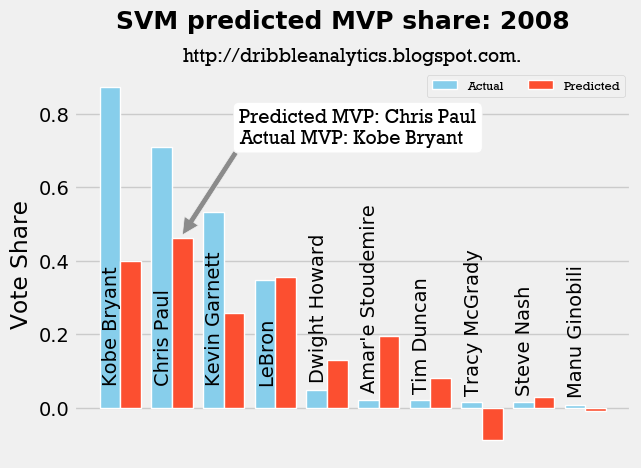

In [35]:
plt.style.use('fivethirtyeight')

svr08, ax = plt.subplots()

ax.bar(x_svr, df08.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
svr08.suptitle("SVM predicted MVP share: 2008", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Chris Paul\nActual MVP: Kobe Bryant", xy = (1.4, 0.47), xycoords = 'data', xytext = (2.5, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr08.savefig('svr-08.png', dpi = 400, bbox_inches = 'tight')

## RF

In [36]:
rfPredict08 = rf.predict(df08Predict)
rfPredict08 = rfPredict08.tolist()

for (i, j) in zip(df08Names, rfPredict08):
    print(i, j)

Kobe Bryant 0.28136
Chris Paul 0.5217800000000001
Kevin Garnett 0.24200000000000013
LeBron 0.39099000000000034
Dwight Howard 0.23772000000000001
Amar'e Stoudemire 0.22326000000000001
Tim Duncan 0.12202000000000002
Tracy McGrady 0.05782000000000002
Steve Nash 0.3086600000000001
Manu Ginobili 0.18347000000000002


In [37]:
rfList = [[i, j] for i, j in zip(df08Names, rfPredict08)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Kobe Bryant', 0.28136], ['Chris Paul', 0.5217800000000001], ['Kevin Garnett', 0.24200000000000013], ['LeBron', 0.39099000000000034], ['Dwight Howard', 0.23772000000000001], ["Amar'e Stoudemire", 0.22326000000000001], ['Tim Duncan', 0.12202000000000002], ['Tracy McGrady', 0.05782000000000002], ['Steve Nash', 0.3086600000000001], ['Manu Ginobili', 0.18347000000000002]]


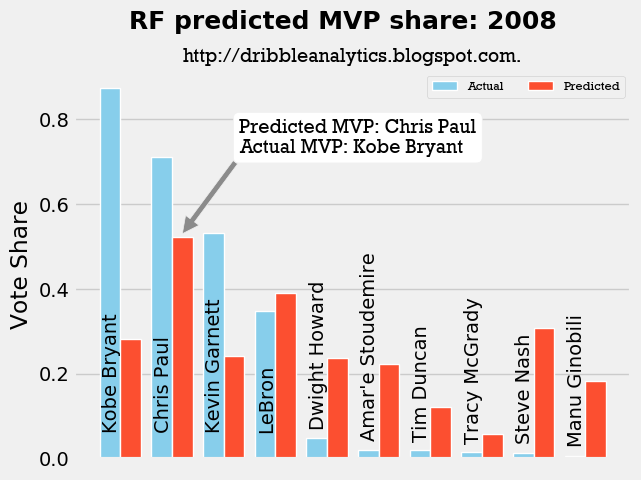

In [38]:
plt.style.use('fivethirtyeight')

rf08, ax = plt.subplots()

ax.bar(x_rf, df08.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf08.suptitle("RF predicted MVP share: 2008", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Chris Paul\nActual MVP: Kobe Bryant", xy = (1.4, 0.53), xycoords = 'data', xytext = (2.5, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf08.savefig('rf-08.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [39]:
knnPredict08 = knn.predict(df08Predict)
knnPredict08 = knnPredict08.tolist()
knnPredict08 = [row[0] for row in knnPredict08]
for (i, j) in zip(df08Names, knnPredict08):
    print(i, j)

Kobe Bryant 0.16616666666666666
Chris Paul 0.2806666666666667
Kevin Garnett 0.23466666666666666
LeBron 0.25
Dwight Howard 0.13583333333333333
Amar'e Stoudemire 0.19033333333333333
Tim Duncan 0.1025
Tracy McGrady 0.05783333333333334
Steve Nash 0.26533333333333337
Manu Ginobili 0.1575


In [40]:
knnList = [[i, j] for i, j in zip(df08Names, knnPredict08)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Kobe Bryant', 0.16616666666666666], ['Chris Paul', 0.2806666666666667], ['Kevin Garnett', 0.23466666666666666], ['LeBron', 0.25], ['Dwight Howard', 0.13583333333333333], ["Amar'e Stoudemire", 0.19033333333333333], ['Tim Duncan', 0.1025], ['Tracy McGrady', 0.05783333333333334], ['Steve Nash', 0.26533333333333337], ['Manu Ginobili', 0.1575]]


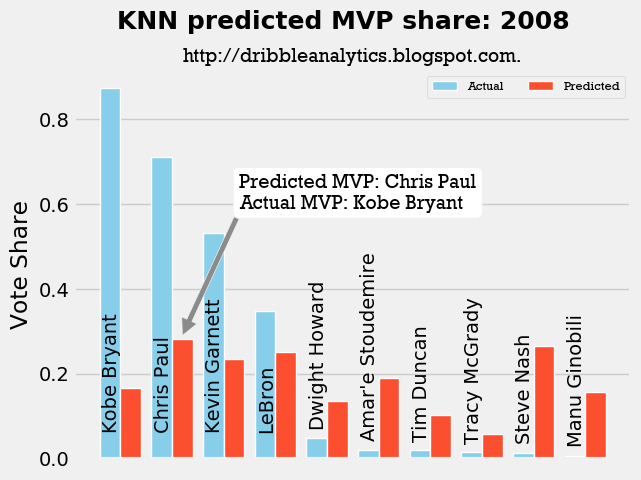

In [41]:
plt.style.use('fivethirtyeight')

knn08, ax = plt.subplots()

ax.bar(x_knn, df08.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
knn08.suptitle("KNN predicted MVP share: 2008", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Chris Paul\nActual MVP: Kobe Bryant", xy = (1.4, 0.29), xycoords = 'data', xytext = (2.5, .59),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn08.savefig('knn-08.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [42]:
dnnPredict08 = dnn.predict(df08Predict)
dnnPredict08 = dnnPredict08.tolist()

for (i, j) in zip(df08Names, dnnPredict08):
    print(i, j)

Kobe Bryant 0.4392163470619319
Chris Paul 0.5013717272687257
Kevin Garnett 0.25110751281749066
LeBron 0.4645224434200983
Dwight Howard 0.07967473413806278
Amar'e Stoudemire 0.20420302043547942
Tim Duncan 0.21566917152419915
Tracy McGrady 0.06862682223131752
Steve Nash 0.1344358794069291
Manu Ginobili 0.03626487686667865


In [43]:
dnnList = [[i, j] for i, j in zip(df08Names, dnnPredict08)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Kobe Bryant', 0.4392163470619319], ['Chris Paul', 0.5013717272687257], ['Kevin Garnett', 0.25110751281749066], ['LeBron', 0.4645224434200983], ['Dwight Howard', 0.07967473413806278], ["Amar'e Stoudemire", 0.20420302043547942], ['Tim Duncan', 0.21566917152419915], ['Tracy McGrady', 0.06862682223131752], ['Steve Nash', 0.1344358794069291], ['Manu Ginobili', 0.03626487686667865]]


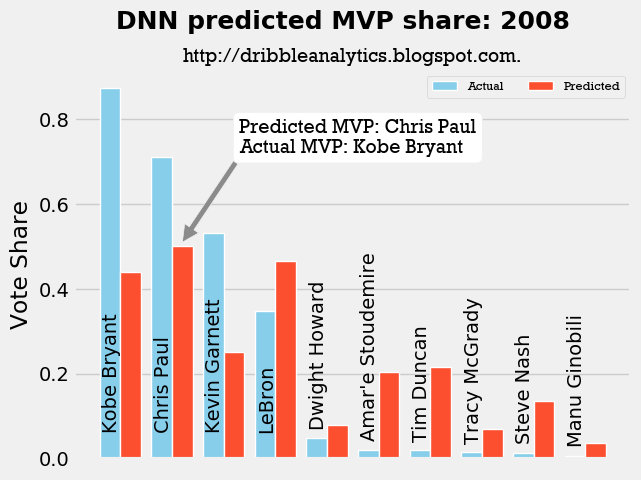

In [44]:
plt.style.use('fivethirtyeight')

dnn08, ax = plt.subplots()

ax.bar(x_dnn, df08.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
dnn08.suptitle("DNN predicted MVP share: 2008", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Chris Paul\nActual MVP: Kobe Bryant", xy = (1.4, 0.51), xycoords = 'data', xytext = (2.5, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn08.savefig('dnn-08.png', dpi = 400, bbox_inches = 'tight')

## Average

[['Kobe Bryant', 0.32133865195602673], ['Chris Paul', 0.44111074865519856], ['Kevin Garnett', 0.2462462097047135], ['LeBron', 0.36550763218685833], ['Dwight Howard', 0.1456399054130429], ["Amar'e Stoudemire", 0.2034703380219471], ['Tim Duncan', 0.13041461586542855], ['Tracy McGrady', 0.023802174919320115], ['Steve Nash', 0.18416458515932807], ['Manu Ginobili', 0.09174644750839867]]


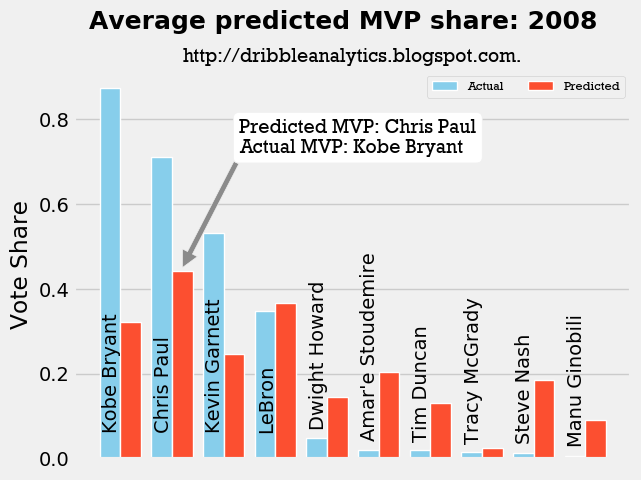

In [45]:
avgPredict08 = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgPredict08.append((i + j + h + k) / 4)

avgList = [[i, j] for i, j in zip(df08Names, avgPredict08)]

avgListData = [row[1] for row in avgList]
avgListNames = [row[0] for row in avgList]
print(avgList)

x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg08, ax = plt.subplots()

ax.bar(x_avg, df08.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df08Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
avg08.suptitle("Average predicted MVP share: 2008", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Chris Paul\nActual MVP: Kobe Bryant", xy = (1.4, 0.45), xycoords = 'data', xytext = (2.5, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg08.savefig('avg-08.png', dpi = 400, bbox_inches = 'tight')

# Prediction: 2009

In [46]:
df09 = pd.read_csv('09-mvp.csv')
df09Names = df09.iloc[:, 1]
df09Predict = df09[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df09.head()

Rank        Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  LeBron James   24  CLE     1172     1210  0.969  81         66   
1     2   Kobe Bryant   30  LAL      698     1210  0.577  82         65   
2     3   Dwyane Wade   27  MIA      680     1210  0.562  79         43   
3     4          DH12   23  ORL      328     1210  0.271  79         59   
4     5    Chris Paul   23  NOH      192     1210  0.159  78         49   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.344  0.780  20.3  0.318  11.6  13.0   
1             2      ...       0.351  0.856  12.7  0.206   4.9   4.5   
2            14      ...       0.317  0.765  14.7  0.232   9.7  10.7   
3             4      ...       0.000  0.594  13.8  0.234   4.6   4.4   
4            10      ...       0.364  0.868  18.3  0.292  10.0  11.2   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [47]:
svrPredict09 = svr.predict(df09Predict)
svrPredict09 = svrPredict09.tolist()

for (i, j) in zip(df09Names, svrPredict09):
    print(i, j)

LeBron James 0.9808408295954105
Kobe Bryant 0.38789509278526313
Dwyane Wade 0.2860022291937774
DH12 0.27564733017522935
Chris Paul 0.3956995893821673
Chauncey Billups -0.04521527053852137
Paul Pierce 0.09306737109672159
Tony Parker -0.05017139235699486
Brandon Roy 0.14313422190084846
Dirk Nowitzki 0.05757082781756462


In [48]:
svrList = [[i, j] for i, j in zip(df09Names, svrPredict09)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['LeBron James', 0.9808408295954105], ['Kobe Bryant', 0.38789509278526313], ['Dwyane Wade', 0.2860022291937774], ['DH12', 0.27564733017522935], ['Chris Paul', 0.3956995893821673], ['Chauncey Billups', -0.04521527053852137], ['Paul Pierce', 0.09306737109672159], ['Tony Parker', -0.05017139235699486], ['Brandon Roy', 0.14313422190084846], ['Dirk Nowitzki', 0.05757082781756462]]


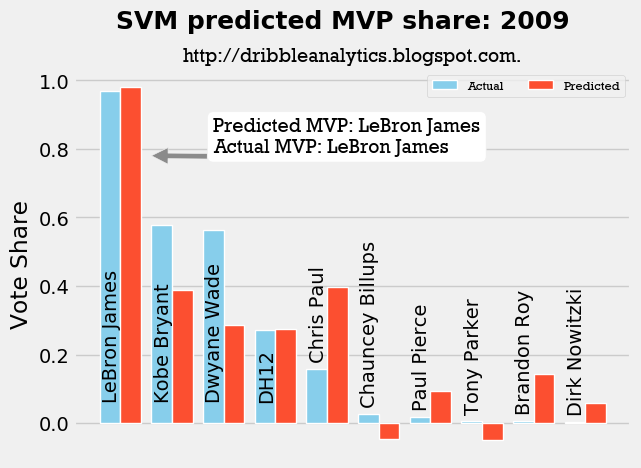

In [49]:
plt.style.use('fivethirtyeight')

svr09, ax = plt.subplots()

ax.bar(x_svr, df09.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
svr09.suptitle("SVM predicted MVP share: 2009", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr09.savefig('svr-09.png', dpi = 400, bbox_inches = 'tight')

## RF

In [50]:
rfPredict09 = rf.predict(df09Predict)
rfPredict09 = rfPredict09.tolist()

for (i, j) in zip(df09Names, rfPredict09):
    print(i, j)

LeBron James 0.8441999999999993
Kobe Bryant 0.26003000000000004
Dwyane Wade 0.37883000000000033
DH12 0.3402200000000002
Chris Paul 0.48733999999999994
Chauncey Billups 0.06505999999999994
Paul Pierce 0.06875999999999995
Tony Parker 0.07797999999999998
Brandon Roy 0.11619
Dirk Nowitzki 0.21288000000000015


In [51]:
rfList = [[i, j] for i, j in zip(df09Names, rfPredict09)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['LeBron James', 0.8441999999999993], ['Kobe Bryant', 0.26003000000000004], ['Dwyane Wade', 0.37883000000000033], ['DH12', 0.3402200000000002], ['Chris Paul', 0.48733999999999994], ['Chauncey Billups', 0.06505999999999994], ['Paul Pierce', 0.06875999999999995], ['Tony Parker', 0.07797999999999998], ['Brandon Roy', 0.11619], ['Dirk Nowitzki', 0.21288000000000015]]


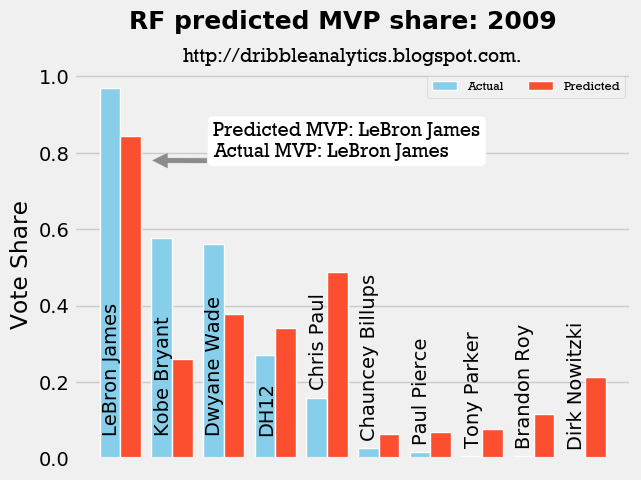

In [52]:
plt.style.use('fivethirtyeight')

rf09, ax = plt.subplots()

ax.bar(x_rf, df09.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
rf09.suptitle("RF predicted MVP share: 2009", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf09.savefig('rf-09.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [53]:
knnPredict09 = knn.predict(df09Predict)
knnPredict09 = knnPredict09.tolist()
knnPredict09 = [row[0] for row in knnPredict09]
for (i, j) in zip(df09Names, knnPredict09):
    print(i, j)

LeBron James 0.9466666666666667
Kobe Bryant 0.42483333333333334
Dwyane Wade 0.2808333333333333
DH12 0.30949999999999994
Chris Paul 0.11816666666666666
Chauncey Billups 0.14733333333333337
Paul Pierce 0.09533333333333334
Tony Parker 0.05000000000000001
Brandon Roy 0.08116666666666666
Dirk Nowitzki 0.09133333333333334


In [54]:
knnList = [[i, j] for i, j in zip(df09Names, knnPredict09)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['LeBron James', 0.9466666666666667], ['Kobe Bryant', 0.42483333333333334], ['Dwyane Wade', 0.2808333333333333], ['DH12', 0.30949999999999994], ['Chris Paul', 0.11816666666666666], ['Chauncey Billups', 0.14733333333333337], ['Paul Pierce', 0.09533333333333334], ['Tony Parker', 0.05000000000000001], ['Brandon Roy', 0.08116666666666666], ['Dirk Nowitzki', 0.09133333333333334]]


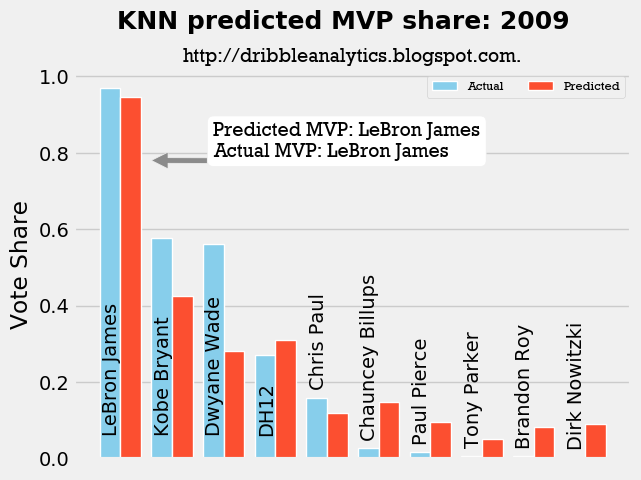

In [55]:
plt.style.use('fivethirtyeight')

knn09, ax = plt.subplots()

ax.bar(x_knn, df09.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
knn09.suptitle("KNN predicted MVP share: 2009", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn09.savefig('knn-09.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [56]:
dnnPredict09 = dnn.predict(df09Predict)
dnnPredict09 = dnnPredict09.tolist()

for (i, j) in zip(df09Names, dnnPredict09):
    print(i, j)

LeBron James 0.8919085402932632
Kobe Bryant 0.3918952063407255
Dwyane Wade 0.34659237419062694
DH12 0.27689864734065295
Chris Paul 0.4423396103379893
Chauncey Billups 0.06507294619928825
Paul Pierce 0.11348325232694709
Tony Parker 0.05067138986841943
Brandon Roy 0.21300232062883648
Dirk Nowitzki 0.0915766361443475


In [57]:
dnnList = [[i, j] for i, j in zip(df09Names, dnnPredict09)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['LeBron James', 0.8919085402932632], ['Kobe Bryant', 0.3918952063407255], ['Dwyane Wade', 0.34659237419062694], ['DH12', 0.27689864734065295], ['Chris Paul', 0.4423396103379893], ['Chauncey Billups', 0.06507294619928825], ['Paul Pierce', 0.11348325232694709], ['Tony Parker', 0.05067138986841943], ['Brandon Roy', 0.21300232062883648], ['Dirk Nowitzki', 0.0915766361443475]]


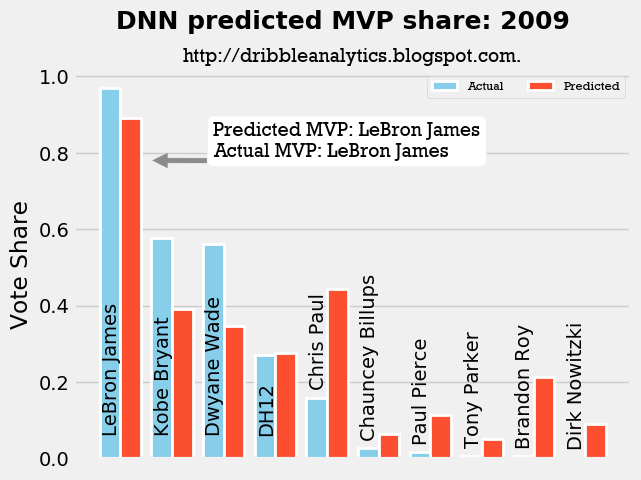

In [58]:
plt.style.use('fivethirtyeight')

dnn09, ax = plt.subplots()

ax.bar(x_dnn, df09.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 2, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 2, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
dnn09.suptitle("DNN predicted MVP share: 2009", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn09.savefig('dnn-09.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.9159040091388349, 0.3661634081148305, 0.3230644841794345, 0.3005664943789706, 0.3608864665967058, 0.05806275224852505, 0.09266098918925048, 0.03211999937785614, 0.1383733022990879, 0.1133401993238114]


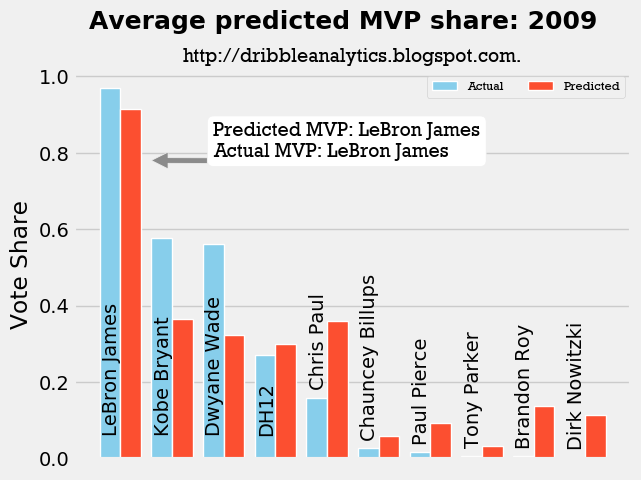

In [59]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg09, ax = plt.subplots()

ax.bar(x_avg, df09.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df09Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
avg09.suptitle("Average predicted MVP share: 2009", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg09.savefig('avg-09.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2010

In [60]:
df10 = pd.read_csv('10-mvp.csv')
df10Names = df10.iloc[:, 1]
df10Predict = df10[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df10.head()

Rank        Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  LeBron James   25  CLE     1205     1230  0.980  76         61   
1     2  Kevin Durant   21  OKC      609     1230  0.495  82         50   
2     3   Kobe Bryant   31  LAL      599     1230  0.487  73         57   
3     4          DH12   24  ORL      478     1230  0.389  82         59   
4     5   Dwyane Wade   28  MIA      119     1230  0.097  77         47   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.333  0.767  18.5  0.299  10.9  12.5   
1            10      ...       0.365  0.900  16.1  0.238   5.8   5.1   
2             3      ...       0.329  0.811   9.4  0.160   4.0   3.6   
3             2      ...       0.000  0.592  13.2  0.223   5.4   5.5   
4            13      ...       0.300  0.761  13.0  0.224   8.0   9.4   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [61]:
svrPredict10 = svr.predict(df10Predict)
svrPredict10 = svrPredict10.tolist()

for (i, j) in zip(df10Names, svrPredict10):
    print(i, j)

LeBron James 0.856736449055975
Kevin Durant 0.31822668319400793
Kobe Bryant 0.16017621039832508
DH12 0.24838684935061006
Dwyane Wade 0.13560036057473002
Carmelo Anthony 0.013566874187063815
Dirk Nowitzki 0.18001506847529458
Steve Nash 0.009251528599238723
Deron Williams 0.04881307983747685
Amar'e Stoudemire 0.027611195876233507


In [62]:
svrList = [[i, j] for i, j in zip(df10Names, svrPredict10)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['LeBron James', 0.856736449055975], ['Kevin Durant', 0.31822668319400793], ['Kobe Bryant', 0.16017621039832508], ['DH12', 0.24838684935061006], ['Dwyane Wade', 0.13560036057473002], ['Carmelo Anthony', 0.013566874187063815], ['Dirk Nowitzki', 0.18001506847529458], ['Steve Nash', 0.009251528599238723], ['Deron Williams', 0.04881307983747685], ["Amar'e Stoudemire", 0.027611195876233507]]


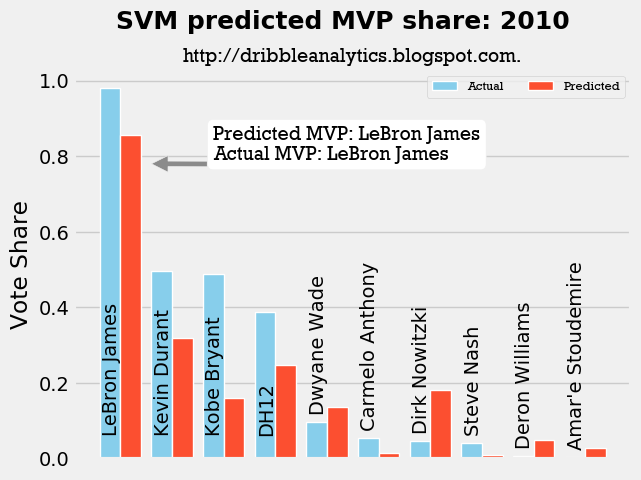

In [63]:
plt.style.use('fivethirtyeight')

svr10, ax = plt.subplots()

ax.bar(x_svr, df10.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr10.suptitle("SVM predicted MVP share: 2010", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr10.savefig('svr-10.png', dpi = 400, bbox_inches = 'tight')

## RF

In [64]:
rfPredict10 = rf.predict(df10Predict)
rfPredict10 = rfPredict10.tolist()

for (i, j) in zip(df10Names, rfPredict10):
    print(i, j)

LeBron James 0.8572899999999997
Kevin Durant 0.32687
Kobe Bryant 0.08678999999999996
DH12 0.37903000000000014
Dwyane Wade 0.24733000000000005
Carmelo Anthony 0.07886000000000001
Dirk Nowitzki 0.3161700000000002
Steve Nash 0.34452999999999995
Deron Williams 0.06224999999999998
Amar'e Stoudemire 0.10536000000000001


In [65]:
rfList = [[i, j] for i, j in zip(df10Names, rfPredict10)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['LeBron James', 0.8572899999999997], ['Kevin Durant', 0.32687], ['Kobe Bryant', 0.08678999999999996], ['DH12', 0.37903000000000014], ['Dwyane Wade', 0.24733000000000005], ['Carmelo Anthony', 0.07886000000000001], ['Dirk Nowitzki', 0.3161700000000002], ['Steve Nash', 0.34452999999999995], ['Deron Williams', 0.06224999999999998], ["Amar'e Stoudemire", 0.10536000000000001]]


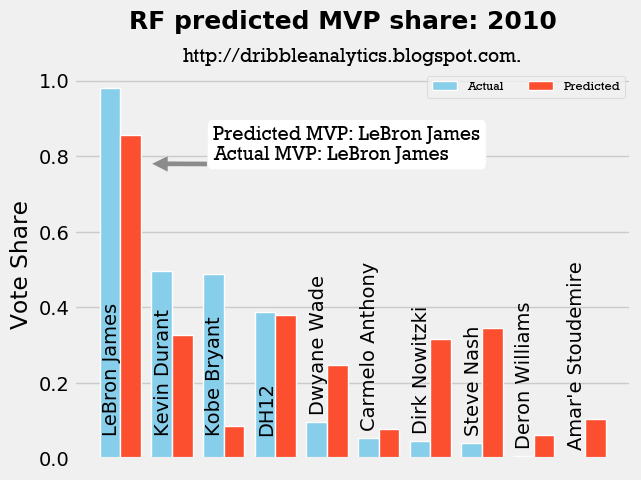

In [66]:
plt.style.use('fivethirtyeight')

rf10, ax = plt.subplots()

ax.bar(x_rf, df10.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf10.suptitle("RF predicted MVP share: 2010", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf10.savefig('rf-10.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [67]:
knnPredict10 = knn.predict(df10Predict)
knnPredict10 = knnPredict10.tolist()
knnPredict10 = [row[0] for row in knnPredict10]
for (i, j) in zip(df10Names, knnPredict10):
    print(i, j)

LeBron James 0.8273333333333334
Kevin Durant 0.22699999999999998
Kobe Bryant 0.20866666666666667
DH12 0.19116666666666668
Dwyane Wade 0.1491666666666667
Carmelo Anthony 0.2316666666666667
Dirk Nowitzki 0.2035
Steve Nash 0.26533333333333337
Deron Williams 0.1486666666666667
Amar'e Stoudemire 0.107


In [68]:
knnList = [[i, j] for i, j in zip(df10Names, knnPredict10)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['LeBron James', 0.8273333333333334], ['Kevin Durant', 0.22699999999999998], ['Kobe Bryant', 0.20866666666666667], ['DH12', 0.19116666666666668], ['Dwyane Wade', 0.1491666666666667], ['Carmelo Anthony', 0.2316666666666667], ['Dirk Nowitzki', 0.2035], ['Steve Nash', 0.26533333333333337], ['Deron Williams', 0.1486666666666667], ["Amar'e Stoudemire", 0.107]]


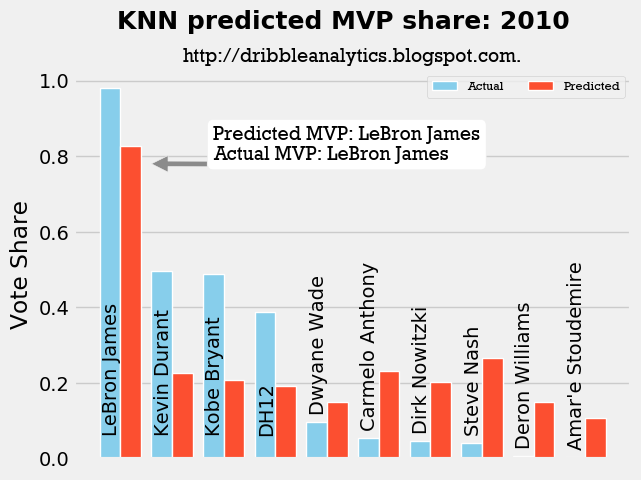

In [69]:
plt.style.use('fivethirtyeight')

knn10, ax = plt.subplots()

ax.bar(x_knn, df10.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn10.suptitle("KNN predicted MVP share: 2010", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn10.savefig('knn-10.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [70]:
dnnPredict10 = dnn.predict(df10Predict)
dnnPredict10 = dnnPredict10.tolist()

for (i, j) in zip(df10Names, dnnPredict10):
    print(i, j)

LeBron James 0.8501871836896437
Kevin Durant 0.3620819470795309
Kobe Bryant 0.24145709516076483
DH12 0.20121082170944835
Dwyane Wade 0.2091643419603952
Carmelo Anthony 0.11384660203420946
Dirk Nowitzki 0.21648973861471685
Steve Nash 0.137563275553475
Deron Williams 0.15176232706789136
Amar'e Stoudemire 0.018317727351897267


In [71]:
dnnList = [[i, j] for i, j in zip(df10Names, dnnPredict10)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['LeBron James', 0.8501871836896437], ['Kevin Durant', 0.3620819470795309], ['Kobe Bryant', 0.24145709516076483], ['DH12', 0.20121082170944835], ['Dwyane Wade', 0.2091643419603952], ['Carmelo Anthony', 0.11384660203420946], ['Dirk Nowitzki', 0.21648973861471685], ['Steve Nash', 0.137563275553475], ['Deron Williams', 0.15176232706789136], ["Amar'e Stoudemire", 0.018317727351897267]]


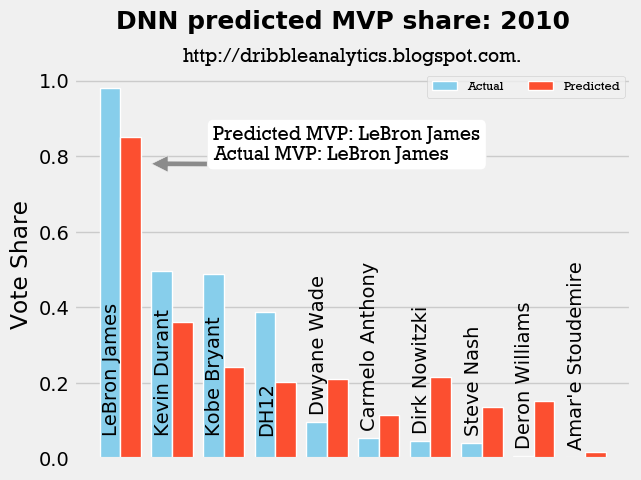

In [72]:
plt.style.use('fivethirtyeight')

dnn10, ax = plt.subplots()

ax.bar(x_dnn, df10.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn10.suptitle("DNN predicted MVP share: 2010", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn10.savefig('dnn-10.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.847886741519738, 0.3085446575683847, 0.17427249305643913, 0.25494858443168134, 0.185315342300448, 0.10948503572198501, 0.2290437017725029, 0.18916953437151177, 0.10287301839300872, 0.0645722308070327]


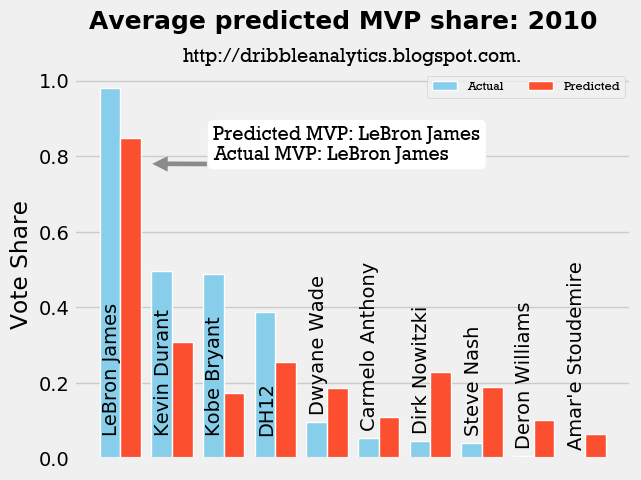

In [73]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg10, ax = plt.subplots()

ax.bar(x_avg, df10.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df10Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg10.suptitle("Average predicted MVP share: 2010", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.8, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg10.savefig('avg-10.png', dpi = 400, bbox_inches = 'tight')

# Prediction: 2011

In [74]:
df11 = pd.read_csv('11-mvp.csv')
df11Names = df11.iloc[:, 1]
df11Predict = df11[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df11.head()

Rank        Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  Derrick Rose   22  CHI     1182     1210  0.977  81         62   
1     2          DH12   25  ORL      643     1210  0.531  78         52   
2     3        LeBron   26  MIA      522     1210  0.431  79         58   
3     4          Kobe   32  LAL      428     1210  0.354  82         57   
4     5            KD   22  OKC      190     1210  0.157  78         55   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP  BPM  \
0             1      ...       0.332  0.858  13.1  0.208   6.0  5.9   
1             8      ...       0.000  0.596  14.4  0.235   5.0  4.8   
2             3      ...       0.330  0.759  15.6  0.244   8.2  8.6   
3             5      ...       0.323  0.828  10.3  0.178   4.1  3.8   
4             7      ...       0.350  0.880  12.0  0.189   3.7  2.9   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [75]:
svrPredict11 = svr.predict(df11Predict)
svrPredict11 = svrPredict11.tolist()

for (i, j) in zip(df11Names, svrPredict11):
    print(i, j)

Derrick Rose 0.40378375241118536
DH12 0.22607198129053852
LeBron 0.5136356984234236
Kobe 0.09121481986855318
KD 0.17946586612960824
Dirk Nowitzki 0.06318281661901604
Dwyane Wade 0.2777639808510599
Manu Ginobili -0.02046563869489515
Amar'e Stoudemire -0.06392668767269893
Blake Griffin 0.014267384284173401
Rajon Rondo -0.0753865414524697


In [76]:
svrList = [[i, j] for i, j in zip(df11Names, svrPredict11)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Derrick Rose', 0.40378375241118536], ['DH12', 0.22607198129053852], ['LeBron', 0.5136356984234236], ['Kobe', 0.09121481986855318], ['KD', 0.17946586612960824], ['Dirk Nowitzki', 0.06318281661901604], ['Dwyane Wade', 0.2777639808510599], ['Manu Ginobili', -0.02046563869489515], ["Amar'e Stoudemire", -0.06392668767269893], ['Blake Griffin', 0.014267384284173401], ['Rajon Rondo', -0.0753865414524697]]


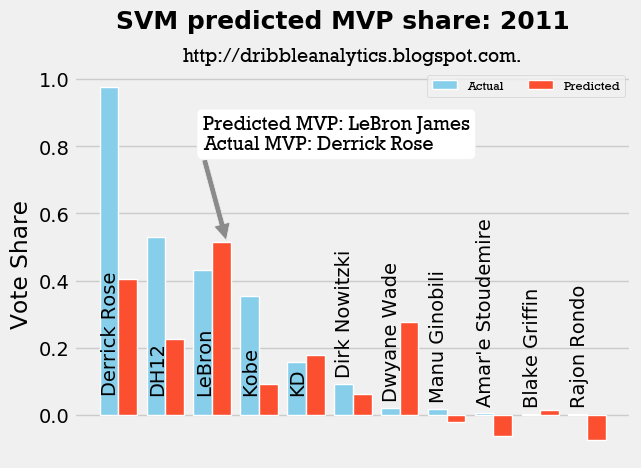

In [77]:
plt.style.use('fivethirtyeight')

svr11, ax = plt.subplots()

ax.bar(x_svr, df11.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr11.suptitle("SVM predicted MVP share: 2011", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: Derrick Rose", xy = (2.5, 0.52), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr11.savefig('svr-11.png', dpi = 400, bbox_inches = 'tight')

## RF

In [78]:
rfPredict11 = rf.predict(df11Predict)
rfPredict11 = rfPredict11.tolist()

for (i, j) in zip(df11Names, rfPredict11):
    print(i, j)

Derrick Rose 0.27706
DH12 0.36798
LeBron 0.48220999999999997
Kobe 0.08102999999999998
KD 0.16496000000000002
Dirk Nowitzki 0.22530999999999995
Dwyane Wade 0.24603000000000003
Manu Ginobili 0.08034999999999995
Amar'e Stoudemire 0.15878999999999988
Blake Griffin 0.06940999999999999
Rajon Rondo 0.10516999999999996


In [79]:
rfList = [[i, j] for i, j in zip(df11Names, rfPredict11)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Derrick Rose', 0.27706], ['DH12', 0.36798], ['LeBron', 0.48220999999999997], ['Kobe', 0.08102999999999998], ['KD', 0.16496000000000002], ['Dirk Nowitzki', 0.22530999999999995], ['Dwyane Wade', 0.24603000000000003], ['Manu Ginobili', 0.08034999999999995], ["Amar'e Stoudemire", 0.15878999999999988], ['Blake Griffin', 0.06940999999999999], ['Rajon Rondo', 0.10516999999999996]]


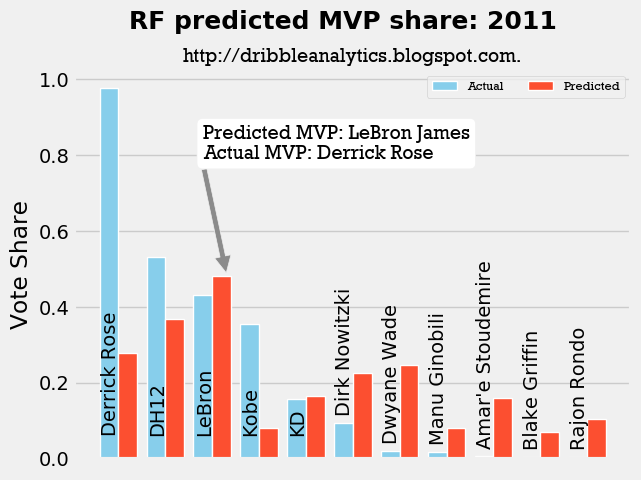

In [80]:
plt.style.use('fivethirtyeight')

rf11, ax = plt.subplots()

ax.bar(x_rf, df11.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf11.suptitle("RF predicted MVP share: 2011", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: Derrick Rose", xy = (2.5, 0.49), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf11.savefig('rf-11.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [81]:
knnPredict11 = knn.predict(df11Predict)
knnPredict11 = knnPredict11.tolist()
knnPredict11 = [row[0] for row in knnPredict11]
for (i, j) in zip(df11Names, knnPredict11):
    print(i, j)

Derrick Rose 0.258
DH12 0.19883333333333333
LeBron 0.3771666666666667
Kobe 0.063
KD 0.10816666666666667
Dirk Nowitzki 0.19066666666666665
Dwyane Wade 0.16583333333333336
Manu Ginobili 0.09933333333333334
Amar'e Stoudemire 0.04716666666666667
Blake Griffin 0.020500000000000004
Rajon Rondo 0.2285


In [82]:
knnList = [[i, j] for i, j in zip(df11Names, knnPredict11)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Derrick Rose', 0.258], ['DH12', 0.19883333333333333], ['LeBron', 0.3771666666666667], ['Kobe', 0.063], ['KD', 0.10816666666666667], ['Dirk Nowitzki', 0.19066666666666665], ['Dwyane Wade', 0.16583333333333336], ['Manu Ginobili', 0.09933333333333334], ["Amar'e Stoudemire", 0.04716666666666667], ['Blake Griffin', 0.020500000000000004], ['Rajon Rondo', 0.2285]]


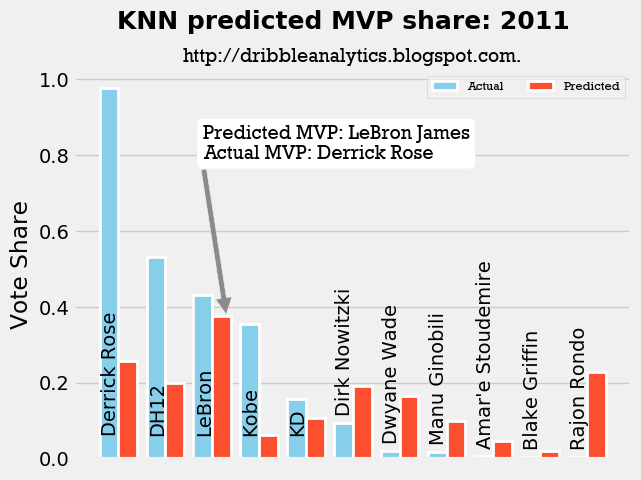

In [83]:
plt.style.use('fivethirtyeight')

knn11, ax = plt.subplots()

ax.bar(x_knn, df11.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 2, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 2, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn11.suptitle("KNN predicted MVP share: 2011", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: Derrick Rose", xy = (2.5, 0.38), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn11.savefig('knn-11.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [84]:
dnnPredict11 = dnn.predict(df11Predict)
dnnPredict11 = dnnPredict11.tolist()

for (i, j) in zip(df11Names, dnnPredict11):
    print(i, j)

Derrick Rose 0.5159707016883119
DH12 0.1971389802782084
LeBron 0.5423187469033255
Kobe 0.19989234722885538
KD 0.23779292690247963
Dirk Nowitzki 0.13424087696389872
Dwyane Wade 0.3169740909405794
Manu Ginobili 0.06059908062013239
Amar'e Stoudemire -0.15198221574873763
Blake Griffin -0.21072172086157817
Rajon Rondo -0.11463798797711203


In [85]:
dnnList = [[i, j] for i, j in zip(df11Names, dnnPredict11)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Derrick Rose', 0.5159707016883119], ['DH12', 0.1971389802782084], ['LeBron', 0.5423187469033255], ['Kobe', 0.19989234722885538], ['KD', 0.23779292690247963], ['Dirk Nowitzki', 0.13424087696389872], ['Dwyane Wade', 0.3169740909405794], ['Manu Ginobili', 0.06059908062013239], ["Amar'e Stoudemire", -0.15198221574873763], ['Blake Griffin', -0.21072172086157817], ['Rajon Rondo', -0.11463798797711203]]


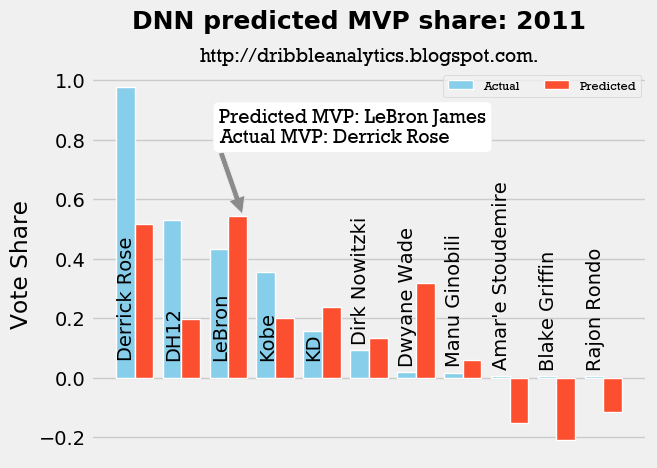

In [86]:
plt.style.use('fivethirtyeight')

dnn11, ax = plt.subplots()

ax.bar(x_dnn, df11.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn11.suptitle("DNN predicted MVP share: 2011", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: Derrick Rose", xy = (2.5, 0.55), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn11.savefig('dnn-11.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.36370361352487435, 0.24750607372552005, 0.47883277799835394, 0.10878429177435214, 0.17259636492468863, 0.15335009006239533, 0.25165035128124313, 0.054954193814642636, -0.002488059188692507, -0.026636084144351195, 0.03591136764260456]


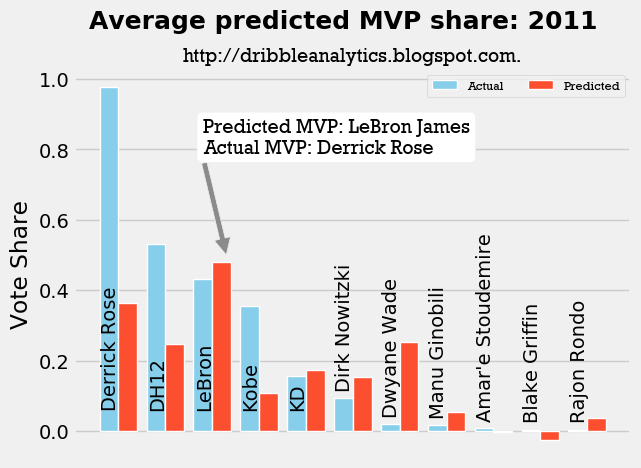

In [87]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg11, ax = plt.subplots()

ax.bar(x_avg, df11.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df11Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg11.suptitle("Average predicted MVP share: 2011", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: Derrick Rose", xy = (2.5, 0.5), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg11.savefig('avg-11.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2012

In [88]:
df12 = pd.read_csv('12-mvp.csv')
df12Names = df12.iloc[:, 1]
df12Predict = df12[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df12.head()

Rank        Player  Age   Tm  Pts Won  Pts Max  Share          G  \
0     1  LeBron James   27  MIA     1074     1210  0.888  77.030303   
1     2  Kevin Durant   23  OKC      889     1210  0.735  82.000000   
2     3           CP3   26  LAC      385     1210  0.318  74.545455   
3     4          Kobe   33  LAL      352     1210  0.291  72.060606   
4     5       Tony P.   29  SAS      331     1210  0.274  74.545455   

   Team Wins  Overall Seed      ...         3P%    FT%         WS  WS/48  \
0  57.151515             4      ...       0.362  0.771  19.090625  0.298   
1  58.393939             3      ...       0.387  0.860  15.166583  0.230   
2  49.696970             9      ...       0.371  0.861  17.286967  0.278   
3  50.939394             6      ...       0.303  0.845   8.681750  0.132   
4  62.121212             2      ...       0.230  0.799   9.706238  0.177   

        VORP   BPM  G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0  11.830492  11.0         62            46        14.5           7.6  
1   7.642800   5.2         66            47        12.2           4.6  
2   8.190000   7.9         60            40        12.7           5.4  
3   3.515847   2.3         58            41         6.2           2.4  
4   2.699318   1.7         60            50         7.1           1.8  

[5 rows x 27 columns]

## SVR 

In [89]:
svrPredict12 = svr.predict(df12Predict)
svrPredict12 = svrPredict12.tolist()

for (i, j) in zip(df12Names, svrPredict12):
    print(i, j)

LeBron James 0.6394708533822289
Kevin Durant 0.46700325226157235
CP3 0.2235221095534008
Kobe 0.060248768968109045
Tony P. 0.03595721644207894
Kevin Love 0.1290419907890754
Dwight Howard 0.05321091897493946
Rajon Rondo -0.04484079399649521
Steve Nash -0.1139330494445272
Dwyane Wade 0.11304915207211397


In [90]:
svrList = [[i, j] for i, j in zip(df12Names, svrPredict12)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['LeBron James', 0.6394708533822289], ['Kevin Durant', 0.46700325226157235], ['CP3', 0.2235221095534008], ['Kobe', 0.060248768968109045], ['Tony P.', 0.03595721644207894], ['Kevin Love', 0.1290419907890754], ['Dwight Howard', 0.05321091897493946], ['Rajon Rondo', -0.04484079399649521], ['Steve Nash', -0.1139330494445272], ['Dwyane Wade', 0.11304915207211397]]


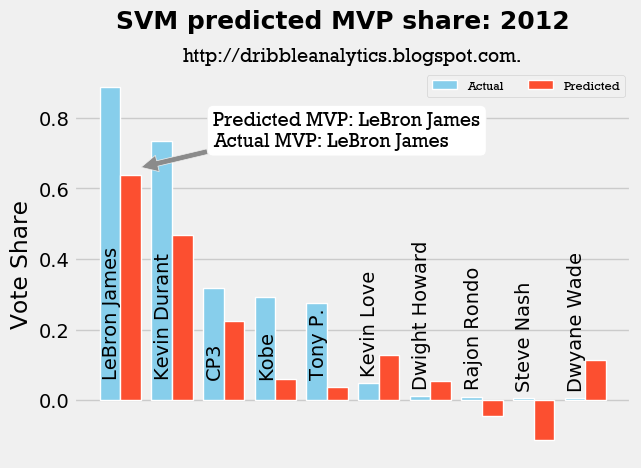

In [91]:
plt.style.use('fivethirtyeight')

svr12, ax = plt.subplots()

ax.bar(x_svr, df12.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr12.suptitle("SVM predicted MVP share: 2012", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.66), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr12.savefig('svr-12.png', dpi = 400, bbox_inches = 'tight')

## RF

In [92]:
rfPredict12 = rf.predict(df12Predict)
rfPredict12 = rfPredict12.tolist()

for (i, j) in zip(df12Names, rfPredict12):
    print(i, j)

LeBron James 0.56566
Kevin Durant 0.35635999999999995
CP3 0.4685000000000001
Kobe 0.06489
Tony P. 0.06505
Kevin Love 0.2783899999999999
Dwight Howard 0.19666000000000003
Rajon Rondo 0.15705
Steve Nash 0.22241000000000002
Dwyane Wade 0.14468999999999993


In [93]:
rfList = [[i, j] for i, j in zip(df12Names, rfPredict12)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['LeBron James', 0.56566], ['Kevin Durant', 0.35635999999999995], ['CP3', 0.4685000000000001], ['Kobe', 0.06489], ['Tony P.', 0.06505], ['Kevin Love', 0.2783899999999999], ['Dwight Howard', 0.19666000000000003], ['Rajon Rondo', 0.15705], ['Steve Nash', 0.22241000000000002], ['Dwyane Wade', 0.14468999999999993]]


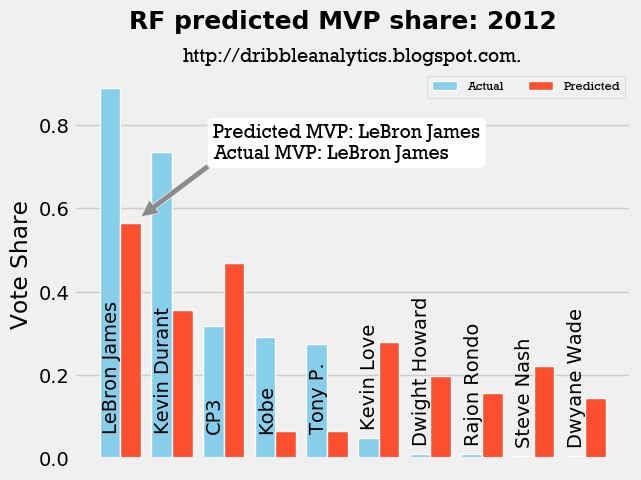

In [94]:
plt.style.use('fivethirtyeight')

rf12, ax = plt.subplots()

ax.bar(x_rf, df12.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf12.suptitle("RF predicted MVP share: 2012", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.58), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf12.savefig('rf-12.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [95]:
knnPredict12 = knn.predict(df12Predict)
knnPredict12 = knnPredict12.tolist()
knnPredict12 = [row[0] for row in knnPredict12]
for (i, j) in zip(df12Names, knnPredict12):
    print(i, j)

LeBron James 0.6788333333333334
Kevin Durant 0.32349999999999995
CP3 0.084
Kobe 0.15283333333333335
Tony P. 0.30450000000000005
Kevin Love 0.05733333333333334
Dwight Howard 0.1436666666666667
Rajon Rondo 0.08633333333333336
Steve Nash 0.0375
Dwyane Wade 0.1795


In [96]:
knnList = [[i, j] for i, j in zip(df12Names, knnPredict12)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['LeBron James', 0.6788333333333334], ['Kevin Durant', 0.32349999999999995], ['CP3', 0.084], ['Kobe', 0.15283333333333335], ['Tony P.', 0.30450000000000005], ['Kevin Love', 0.05733333333333334], ['Dwight Howard', 0.1436666666666667], ['Rajon Rondo', 0.08633333333333336], ['Steve Nash', 0.0375], ['Dwyane Wade', 0.1795]]


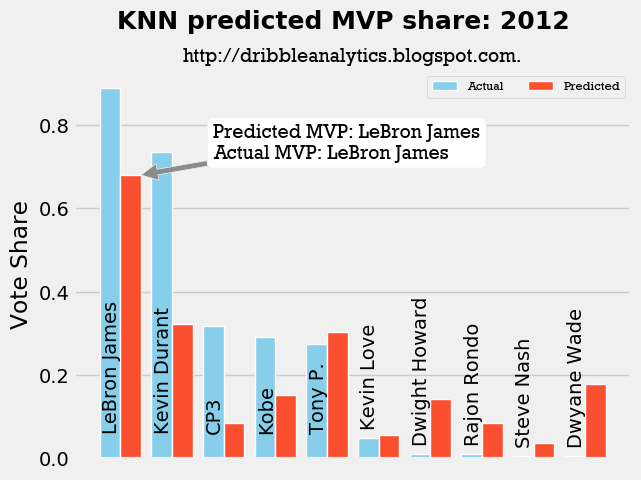

In [97]:
plt.style.use('fivethirtyeight')

knn12, ax = plt.subplots()

ax.bar(x_knn, df12.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn12.suptitle("KNN predicted MVP share: 2012", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.68), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn12.savefig('knn-12.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [98]:
dnnPredict12 = dnn.predict(df12Predict)
dnnPredict12 = dnnPredict12.tolist()

for (i, j) in zip(df12Names, dnnPredict12):
    print(i, j)

LeBron James 0.7699934773137487
Kevin Durant 0.5993067058631796
CP3 0.355173589892402
Kobe 0.23207826678293994
Tony P. 0.20955311089133996
Kevin Love 0.11696358902044654
Dwight Howard 0.026178772802175593
Rajon Rondo -0.05200566616436422
Steve Nash -0.2819020328689803
Dwyane Wade 0.16043467097542116


In [99]:
dnnList = [[i, j] for i, j in zip(df12Names, dnnPredict12)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['LeBron James', 0.7699934773137487], ['Kevin Durant', 0.5993067058631796], ['CP3', 0.355173589892402], ['Kobe', 0.23207826678293994], ['Tony P.', 0.20955311089133996], ['Kevin Love', 0.11696358902044654], ['Dwight Howard', 0.026178772802175593], ['Rajon Rondo', -0.05200566616436422], ['Steve Nash', -0.2819020328689803], ['Dwyane Wade', 0.16043467097542116]]


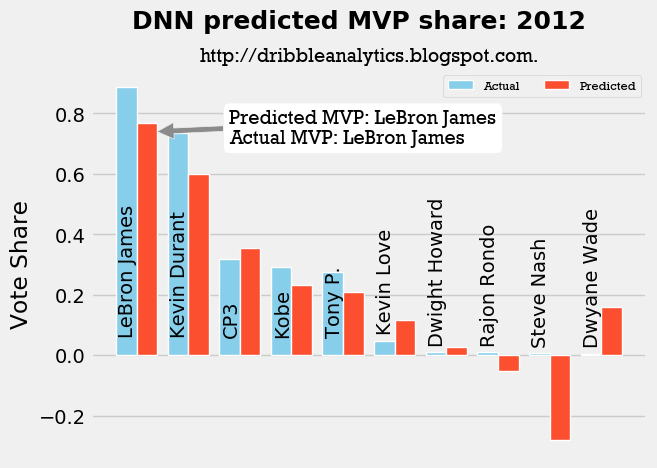

In [100]:
plt.style.use('fivethirtyeight')

dnn12, ax = plt.subplots()

ax.bar(x_dnn, df12.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn12.suptitle("DNN predicted MVP share: 2012", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.74), xycoords = 'data', xytext = (2, .7),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn12.savefig('dnn-12.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.6634894160073277, 0.43654248953118796, 0.28279892486145075, 0.1275125922710956, 0.15376508183335474, 0.1454322282857138, 0.10492908961094544, 0.03663421829311848, -0.03398127057837687, 0.14941845576188376]


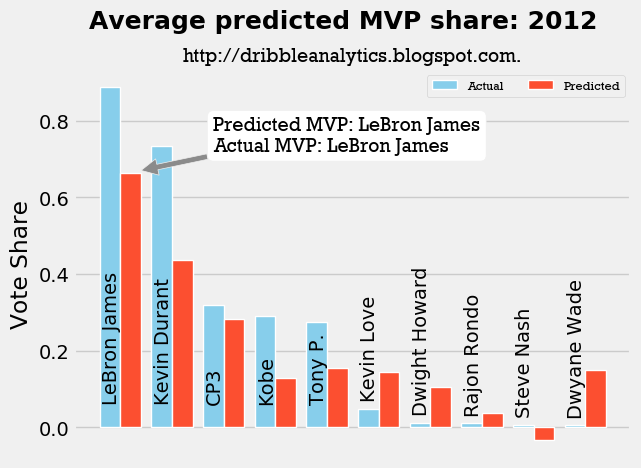

In [101]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg12, ax = plt.subplots()

ax.bar(x_avg, df12.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df12Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 4:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 4:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg12.suptitle("Average predicted MVP share: 2012", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.67), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg12.savefig('avg-12.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2013

In [102]:
df13 = pd.read_csv('13-mvp.csv')
df13Names = df13.iloc[:, 1]
df13Predict = df13[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df13.head()

Rank        Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  LeBron James   28  MIA     1207     1210  0.998  76         66   
1     2  Kevin Durant   24  OKC      765     1210  0.632  81         60   
2     3          Melo   28  NYK      475     1210  0.393  67         54   
3     4           CP3   27  LAC      289     1210  0.239  70         56   
4     5          Kobe   34  LAL      184     1210  0.152  78         45   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.406  0.753  19.3  0.322   9.8  11.6   
1             2      ...       0.416  0.905  18.9  0.291   7.6   7.7   
2             7      ...       0.379  0.830   9.5  0.184   2.8   2.4   
3             5      ...       0.328  0.885  13.9  0.287   5.6   7.5   
4            13      ...       0.324  0.839  10.9  0.174   5.1   4.7   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [103]:
svrPredict13 = svr.predict(df13Predict)
svrPredict13 = svrPredict13.tolist()

for (i, j) in zip(df13Names, svrPredict13):
    print(i, j)

LeBron James 0.8539224786171828
Kevin Durant 0.6716291096157796
Melo 0.05379178549456465
CP3 0.13913815081605452
Kobe 0.06997623618196225
Tony Parker 0.012140660445365326
Tim Duncan -0.032470888461730185
James Harden 0.09662066598934405
Russell Westbrook 0.24101321831387312
Dwyane Wade 0.13998533677664393


In [104]:
svrList = [[i, j] for i, j in zip(df13Names, svrPredict13)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['LeBron James', 0.8539224786171828], ['Kevin Durant', 0.6716291096157796], ['Melo', 0.05379178549456465], ['CP3', 0.13913815081605452], ['Kobe', 0.06997623618196225], ['Tony Parker', 0.012140660445365326], ['Tim Duncan', -0.032470888461730185], ['James Harden', 0.09662066598934405], ['Russell Westbrook', 0.24101321831387312], ['Dwyane Wade', 0.13998533677664393]]


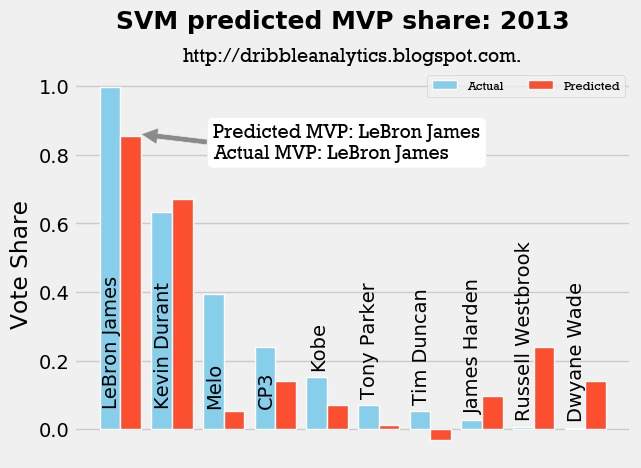

In [105]:
plt.style.use('fivethirtyeight')

svr13, ax = plt.subplots()

ax.bar(x_svr, df13.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr13.suptitle("SVM predicted MVP share: 2013", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.86), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr13.savefig('svr-13.png', dpi = 400, bbox_inches = 'tight')

## RF

In [106]:
rfPredict13 = rf.predict(df13Predict)
rfPredict13 = rfPredict13.tolist()

for (i, j) in zip(df13Names, rfPredict13):
    print(i, j)

LeBron James 0.8595499999999996
Kevin Durant 0.7459199999999997
Melo 0.10295
CP3 0.23867000000000002
Kobe 0.08930999999999997
Tony Parker 0.13562000000000002
Tim Duncan 0.17245000000000002
James Harden 0.18183999999999986
Russell Westbrook 0.13562999999999997
Dwyane Wade 0.08796999999999999


In [107]:
rfList = [[i, j] for i, j in zip(df13Names, rfPredict13)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['LeBron James', 0.8595499999999996], ['Kevin Durant', 0.7459199999999997], ['Melo', 0.10295], ['CP3', 0.23867000000000002], ['Kobe', 0.08930999999999997], ['Tony Parker', 0.13562000000000002], ['Tim Duncan', 0.17245000000000002], ['James Harden', 0.18183999999999986], ['Russell Westbrook', 0.13562999999999997], ['Dwyane Wade', 0.08796999999999999]]


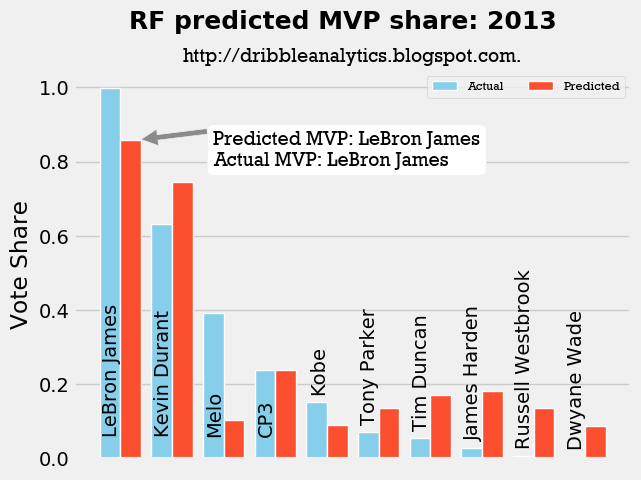

In [108]:
plt.style.use('fivethirtyeight')

rf13, ax = plt.subplots()

ax.bar(x_rf, df13.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf13.suptitle("RF predicted MVP share: 2013", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.86), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf13.savefig('rf-13.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [109]:
knnPredict13 = knn.predict(df13Predict)
knnPredict13 = knnPredict13.tolist()
knnPredict13 = [row[0] for row in knnPredict13]
for (i, j) in zip(df13Names, knnPredict13):
    print(i, j)

LeBron James 0.8878333333333334
Kevin Durant 0.7043333333333334
Melo 0.24666666666666667
CP3 0.1431666666666667
Kobe 0.13283333333333336
Tony Parker 0.046000000000000006
Tim Duncan 0.23016666666666663
James Harden 0.13283333333333336
Russell Westbrook 0.1635
Dwyane Wade 0.12733333333333333


In [110]:
knnList = [[i, j] for i, j in zip(df13Names, knnPredict13)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['LeBron James', 0.8878333333333334], ['Kevin Durant', 0.7043333333333334], ['Melo', 0.24666666666666667], ['CP3', 0.1431666666666667], ['Kobe', 0.13283333333333336], ['Tony Parker', 0.046000000000000006], ['Tim Duncan', 0.23016666666666663], ['James Harden', 0.13283333333333336], ['Russell Westbrook', 0.1635], ['Dwyane Wade', 0.12733333333333333]]


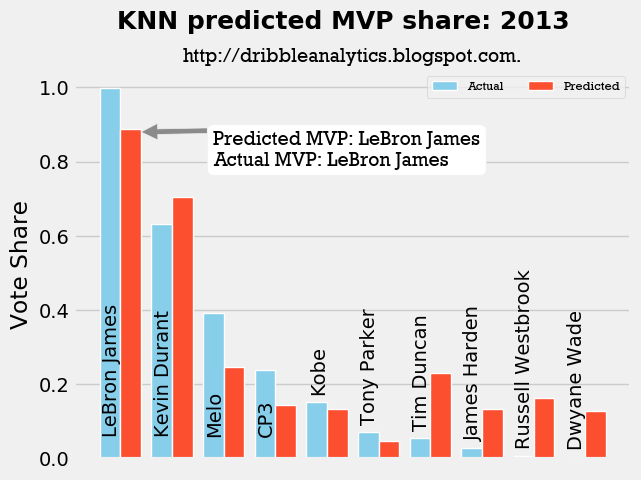

In [111]:
plt.style.use('fivethirtyeight')

knn13, ax = plt.subplots()

ax.bar(x_knn, df13.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn13.suptitle("KNN predicted MVP share: 2013", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.88), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn13.savefig('knn-13.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [112]:
dnnPredict13 = dnn.predict(df13Predict)
dnnPredict13 = dnnPredict13.tolist()

for (i, j) in zip(df13Names, dnnPredict13):
    print(i, j)

LeBron James 0.6866490402191887
Kevin Durant 0.6317614791458899
Melo 0.20592022547667252
CP3 0.16909748064838911
Kobe 0.14131120124947902
Tony Parker 0.12647939206926903
Tim Duncan 0.07175509171071923
James Harden 0.17040271352076328
Russell Westbrook 0.34263288704499373
Dwyane Wade 0.12246409728615301


In [113]:
dnnList = [[i, j] for i, j in zip(df13Names, dnnPredict13)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['LeBron James', 0.6866490402191887], ['Kevin Durant', 0.6317614791458899], ['Melo', 0.20592022547667252], ['CP3', 0.16909748064838911], ['Kobe', 0.14131120124947902], ['Tony Parker', 0.12647939206926903], ['Tim Duncan', 0.07175509171071923], ['James Harden', 0.17040271352076328], ['Russell Westbrook', 0.34263288704499373], ['Dwyane Wade', 0.12246409728615301]]


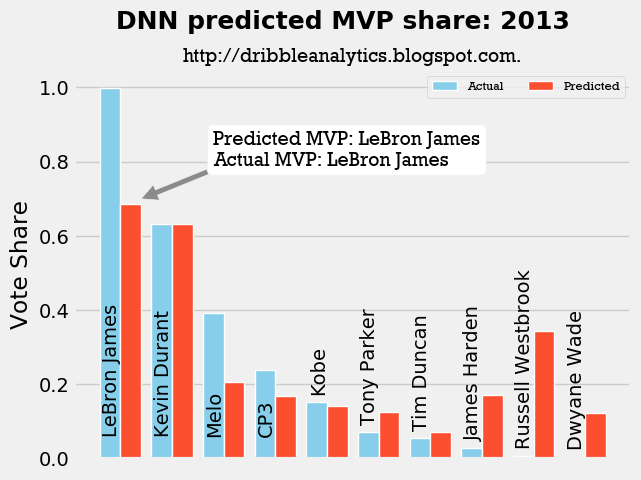

In [114]:
plt.style.use('fivethirtyeight')

dnn13, ax = plt.subplots()

ax.bar(x_dnn, df13.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn13.suptitle("DNN predicted MVP share: 2013", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.7), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn13.savefig('dnn-13.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.8219887130424262, 0.6884109805237506, 0.15233216940947597, 0.1725180745327776, 0.10835769269119366, 0.0800600131286586, 0.11047521747891392, 0.14542417821086015, 0.22069402633971671, 0.11943819184903257]


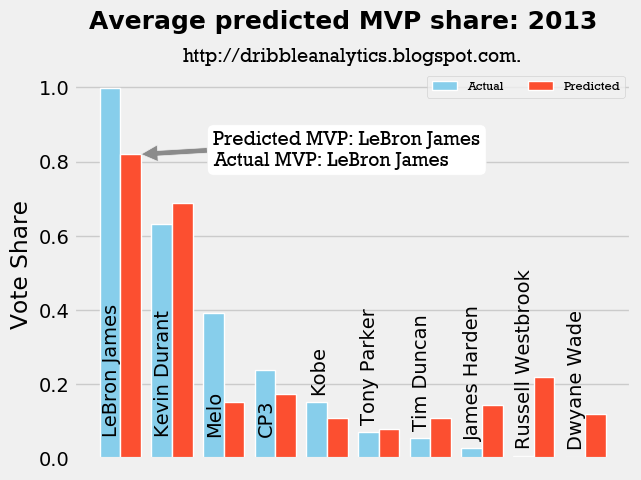

In [115]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg13, ax = plt.subplots()

ax.bar(x_avg, df13.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df13Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg13.suptitle("Average predicted MVP share: 2013", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.82), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg13.savefig('avg-13.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2014

In [116]:
df14 = pd.read_csv('14-mvp.csv')
df14Names = df14.iloc[:, 1]
df14Predict = df14[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df14.head()

Rank         Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1   Kevin Durant   25  OKC     1232     1250  0.986  81         59   
1     2   LeBron James   29  MIA      891     1250  0.713  77         54   
2     3  Blake Griffin   24  LAC      434     1250  0.347  80         57   
3     4    Joakim Noah   28  CHI      322     1250  0.258  80         48   
4     5   James Harden   24  HOU       85     1250  0.068  73         54   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP  BPM  \
0             2      ...       0.391  0.873  19.2  0.295   8.5  8.8   
1             6      ...       0.379  0.750  15.9  0.264   8.0  8.9   
2             3      ...       0.273  0.715  12.2  0.205   4.8  4.6   
3            11      ...       0.000  0.737  11.2  0.190   6.1  6.6   
4             5      ...       0.366  0.866  12.8  0.221   5.4  5.7   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [117]:
svrPredict14 = svr.predict(df14Predict)
svrPredict14 = svrPredict14.tolist()

for (i, j) in zip(df14Names, svrPredict14):
    print(i, j)

Kevin Durant 0.7805159475255674
LeBron James 0.3901748846805819
Blake Griffin 0.22708292927025897
Joakim Noah -0.03639028575655989
James Harden 0.20488084254758188
Stephen Curry 0.18666596294134652
Chris Paul 0.18966706965903124
Al Jefferson -0.12861119007293742
Paul George 0.06665646384232171
LaMarcus Aldridge -0.03126094905783394


In [118]:
svrList = [[i, j] for i, j in zip(df14Names, svrPredict14)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Kevin Durant', 0.7805159475255674], ['LeBron James', 0.3901748846805819], ['Blake Griffin', 0.22708292927025897], ['Joakim Noah', -0.03639028575655989], ['James Harden', 0.20488084254758188], ['Stephen Curry', 0.18666596294134652], ['Chris Paul', 0.18966706965903124], ['Al Jefferson', -0.12861119007293742], ['Paul George', 0.06665646384232171], ['LaMarcus Aldridge', -0.03126094905783394]]


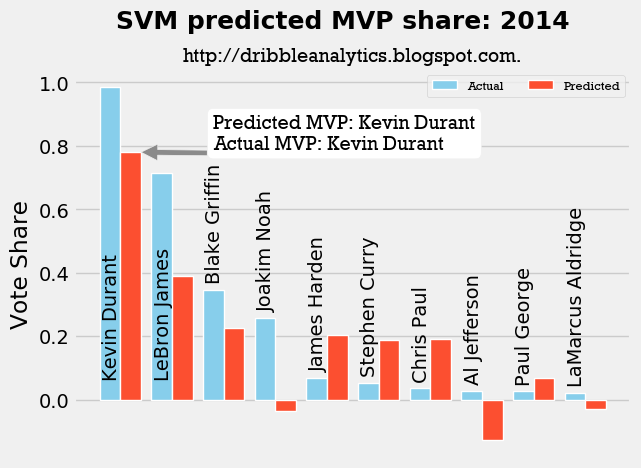

In [119]:
plt.style.use('fivethirtyeight')

svr14, ax = plt.subplots()

ax.bar(x_svr, df14.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 1:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 1:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr14.suptitle("SVM predicted MVP share: 2014", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Kevin Durant\nActual MVP: Kevin Durant", xy = (.6, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr14.savefig('svr-14.png', dpi = 400, bbox_inches = 'tight')

## RF

In [120]:
rfPredict14 = rf.predict(df14Predict)
rfPredict14 = rfPredict14.tolist()

for (i, j) in zip(df14Names, rfPredict14):
    print(i, j)

Kevin Durant 0.7688699999999996
LeBron James 0.3030200000000002
Blake Griffin 0.15964999999999996
Joakim Noah 0.09691999999999996
James Harden 0.21494999999999995
Stephen Curry 0.25514
Chris Paul 0.21988
Al Jefferson 0.05490999999999999
Paul George 0.09801999999999995
LaMarcus Aldridge 0.07183000000000003


In [121]:
rfList = [[i, j] for i, j in zip(df14Names, rfPredict14)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Kevin Durant', 0.7688699999999996], ['LeBron James', 0.3030200000000002], ['Blake Griffin', 0.15964999999999996], ['Joakim Noah', 0.09691999999999996], ['James Harden', 0.21494999999999995], ['Stephen Curry', 0.25514], ['Chris Paul', 0.21988], ['Al Jefferson', 0.05490999999999999], ['Paul George', 0.09801999999999995], ['LaMarcus Aldridge', 0.07183000000000003]]


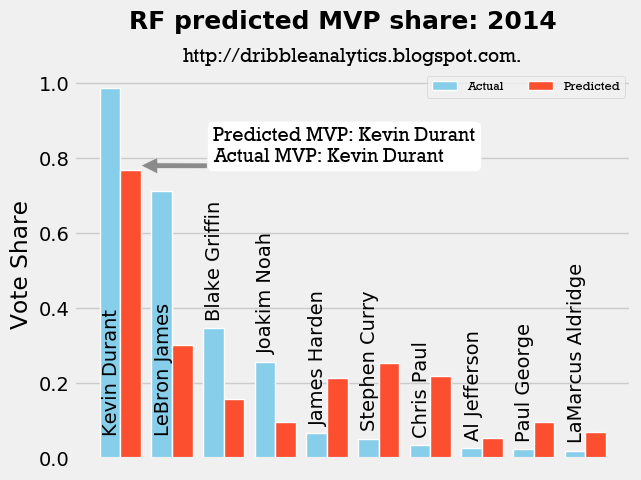

In [122]:
plt.style.use('fivethirtyeight')

rf14, ax = plt.subplots()

ax.bar(x_rf, df14.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 1:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 1:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf14.suptitle("RF predicted MVP share: 2014", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Kevin Durant\nActual MVP: Kevin Durant", xy = (.6, 0.78), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf14.savefig('rf-14.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [123]:
knnPredict14 = knn.predict(df14Predict)
knnPredict14 = knnPredict14.tolist()
knnPredict14 = [row[0] for row in knnPredict14]
for (i, j) in zip(df14Names, knnPredict14):
    print(i, j)

Kevin Durant 0.7164999999999999
LeBron James 0.26899999999999996
Blake Griffin 0.1595
Joakim Noah 0.04683333333333334
James Harden 0.19799999999999998
Stephen Curry 0.07583333333333335
Chris Paul 0.17400000000000002
Al Jefferson 0.04783333333333334
Paul George 0.05116666666666667
LaMarcus Aldridge 0.043500000000000004


In [124]:
knnList = [[i, j] for i, j in zip(df14Names, knnPredict14)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Kevin Durant', 0.7164999999999999], ['LeBron James', 0.26899999999999996], ['Blake Griffin', 0.1595], ['Joakim Noah', 0.04683333333333334], ['James Harden', 0.19799999999999998], ['Stephen Curry', 0.07583333333333335], ['Chris Paul', 0.17400000000000002], ['Al Jefferson', 0.04783333333333334], ['Paul George', 0.05116666666666667], ['LaMarcus Aldridge', 0.043500000000000004]]


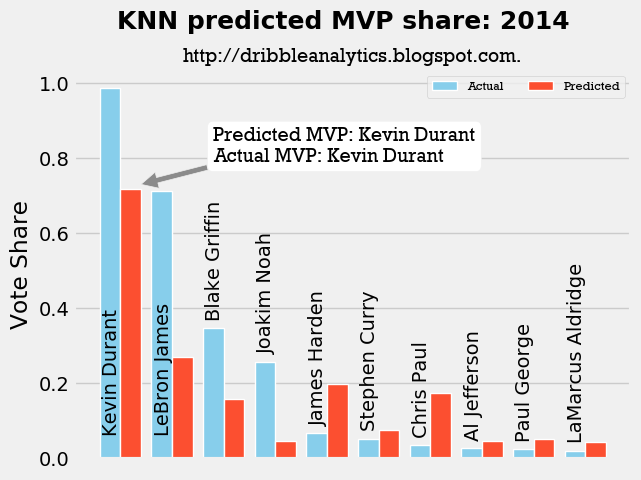

In [125]:
plt.style.use('fivethirtyeight')

knn14, ax = plt.subplots()

ax.bar(x_knn, df14.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 1:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 1:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn14.suptitle("KNN predicted MVP share: 2014", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Kevin Durant\nActual MVP: Kevin Durant", xy = (.6, 0.73), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn14.savefig('knn-14.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [126]:
dnnPredict14 = dnn.predict(df14Predict)
dnnPredict14 = dnnPredict14.tolist()

for (i, j) in zip(df14Names, dnnPredict14):
    print(i, j)

Kevin Durant 0.761427562593809
LeBron James 0.36943061596719473
Blake Griffin 0.2519282206701632
Joakim Noah 0.0372440938752818
James Harden 0.29964360170858195
Stephen Curry 0.28595153299774956
Chris Paul 0.2430661420348412
Al Jefferson -0.17215639049567802
Paul George 0.12656164582225823
LaMarcus Aldridge 0.12225968494984205


In [127]:
dnnList = [[i, j] for i, j in zip(df14Names, dnnPredict14)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Kevin Durant', 0.761427562593809], ['LeBron James', 0.36943061596719473], ['Blake Griffin', 0.2519282206701632], ['Joakim Noah', 0.0372440938752818], ['James Harden', 0.29964360170858195], ['Stephen Curry', 0.28595153299774956], ['Chris Paul', 0.2430661420348412], ['Al Jefferson', -0.17215639049567802], ['Paul George', 0.12656164582225823], ['LaMarcus Aldridge', 0.12225968494984205]]


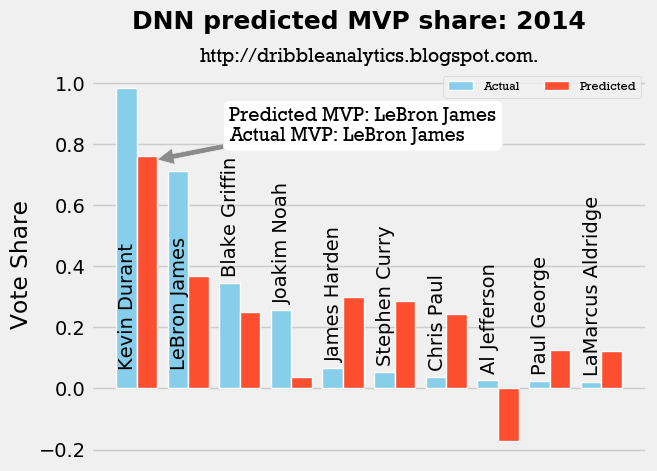

In [128]:
plt.style.use('fivethirtyeight')

dnn14, ax = plt.subplots()

ax.bar(x_dnn, df14.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 1:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 1:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn14.suptitle("DNN predicted MVP share: 2014", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: LeBron James\nActual MVP: LeBron James", xy = (.6, 0.75), xycoords = 'data', xytext = (2, .81),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn14.savefig('dnn-14.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.7568283775298439, 0.3329063751619442, 0.19954028748510552, 0.036151785363013805, 0.22936861106404094, 0.20089770731810735, 0.20665330292346812, -0.04950606180882053, 0.08560119408281164, 0.05158218397300204]


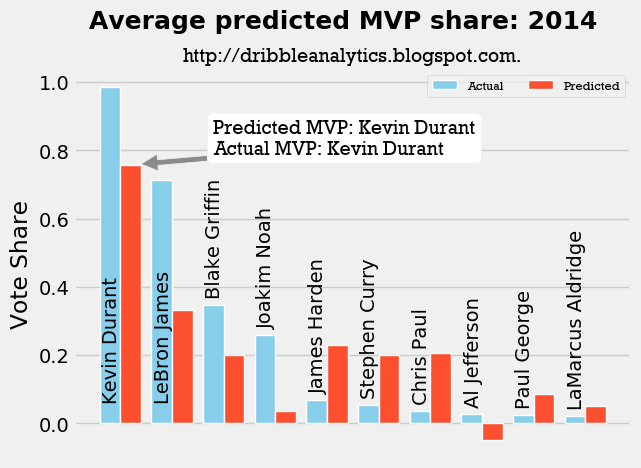

In [129]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg14, ax = plt.subplots()

ax.bar(x_avg, df14.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df14Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 1:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 1:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg14.suptitle("Average predicted MVP share: 2014", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Kevin Durant\nActual MVP: Kevin Durant", xy = (.6, 0.76), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg14.savefig('avg-14.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2015

In [130]:
df15 = pd.read_csv('15-mvp.csv')
df15Names = df15.iloc[:, 1]
df15Predict = df15[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df15.head()

Rank         Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  Stephen Curry   26  GSW     1198     1300  0.922  80         67   
1     2   James Harden   25  HOU      936     1300  0.720  81         56   
2     3         LeBron   30  CLE      552     1300  0.425  69         53   
3     4      Westbrook   26  OKC      352     1300  0.271  67         45   
4     5  Anthony Davis   21  NOP      203     1300  0.156  68         45   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.443  0.914  15.7  0.288   7.9   9.9   
1             3      ...       0.375  0.868  16.4  0.265   7.8   8.4   
2             7      ...       0.354  0.710  10.4  0.199   5.9   7.4   
3            14      ...       0.299  0.835  10.6  0.222   7.6  11.0   
4            13      ...       0.083  0.805  14.0  0.274   5.7   7.1   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [131]:
svrPredict15 = svr.predict(df15Predict)
svrPredict15 = svrPredict15.tolist()

for (i, j) in zip(df15Names, svrPredict15):
    print(i, j)

Stephen Curry 0.5299515502713124
James Harden 0.48484730303809687
LeBron 0.13140619055231428
Westbrook 0.11167551599727932
Anthony Davis 0.10275389956859615
Chris Paul 0.3014339266980446
LaMarcus Aldridge -0.05278084605801081
Marc Gasol -0.01951622455723201
Blake Griffin 0.03526846521948701


In [132]:
svrList = [[i, j] for i, j in zip(df15Names, svrPredict15)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Stephen Curry', 0.5299515502713124], ['James Harden', 0.48484730303809687], ['LeBron', 0.13140619055231428], ['Westbrook', 0.11167551599727932], ['Anthony Davis', 0.10275389956859615], ['Chris Paul', 0.3014339266980446], ['LaMarcus Aldridge', -0.05278084605801081], ['Marc Gasol', -0.01951622455723201], ['Blake Griffin', 0.03526846521948701]]


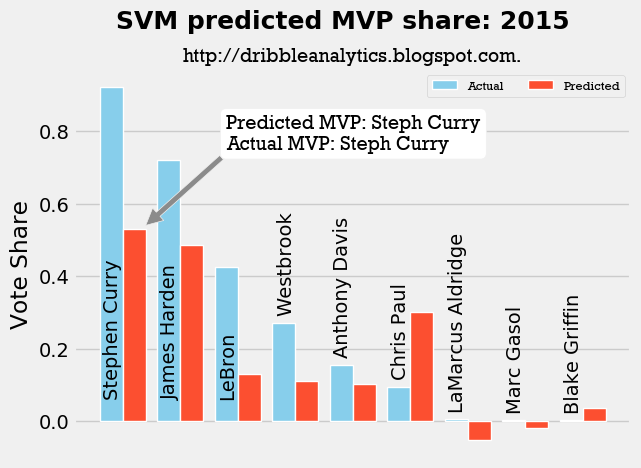

In [133]:
plt.style.use('fivethirtyeight')

svr15, ax = plt.subplots()

ax.bar(x_svr, df15.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr15.suptitle("SVM predicted MVP share: 2015", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.54), xycoords = 'data', xytext = (2, .75),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr15.savefig('svr-15.png', dpi = 400, bbox_inches = 'tight')

## RF

In [134]:
rfPredict15 = rf.predict(df15Predict)
rfPredict15 = rfPredict15.tolist()

for (i, j) in zip(df15Names, rfPredict15):
    print(i, j)

Stephen Curry 0.7338800000000006
James Harden 0.5388300000000004
LeBron 0.1772399999999999
Westbrook 0.20445999999999984
Anthony Davis 0.24870999999999982
Chris Paul 0.3878000000000003
LaMarcus Aldridge 0.10390000000000005
Marc Gasol 0.06194999999999997
Blake Griffin 0.05401999999999998


In [135]:
rfList = [[i, j] for i, j in zip(df15Names, rfPredict15)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Stephen Curry', 0.7338800000000006], ['James Harden', 0.5388300000000004], ['LeBron', 0.1772399999999999], ['Westbrook', 0.20445999999999984], ['Anthony Davis', 0.24870999999999982], ['Chris Paul', 0.3878000000000003], ['LaMarcus Aldridge', 0.10390000000000005], ['Marc Gasol', 0.06194999999999997], ['Blake Griffin', 0.05401999999999998]]


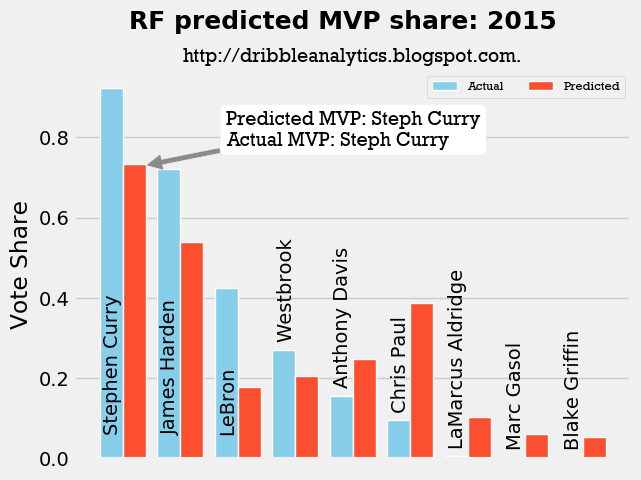

In [136]:
plt.style.use('fivethirtyeight')

rf15, ax = plt.subplots()

ax.bar(x_rf, df15.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf15.suptitle("RF predicted MVP share: 2015", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.73), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf15.savefig('rf-15.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [137]:
knnPredict15 = knn.predict(df15Predict)
knnPredict15 = knnPredict15.tolist()
knnPredict15 = [row[0] for row in knnPredict15]
for (i, j) in zip(df15Names, knnPredict15):
    print(i, j)

Stephen Curry 0.5538333333333333
James Harden 0.32183333333333336
LeBron 0.19266666666666668
Westbrook 0.17733333333333334
Anthony Davis 0.1575
Chris Paul 0.29983333333333334
LaMarcus Aldridge 0.09016666666666667
Marc Gasol 0.10916666666666668
Blake Griffin 0.09783333333333333


In [138]:
knnList = [[i, j] for i, j in zip(df15Names, knnPredict15)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Stephen Curry', 0.5538333333333333], ['James Harden', 0.32183333333333336], ['LeBron', 0.19266666666666668], ['Westbrook', 0.17733333333333334], ['Anthony Davis', 0.1575], ['Chris Paul', 0.29983333333333334], ['LaMarcus Aldridge', 0.09016666666666667], ['Marc Gasol', 0.10916666666666668], ['Blake Griffin', 0.09783333333333333]]


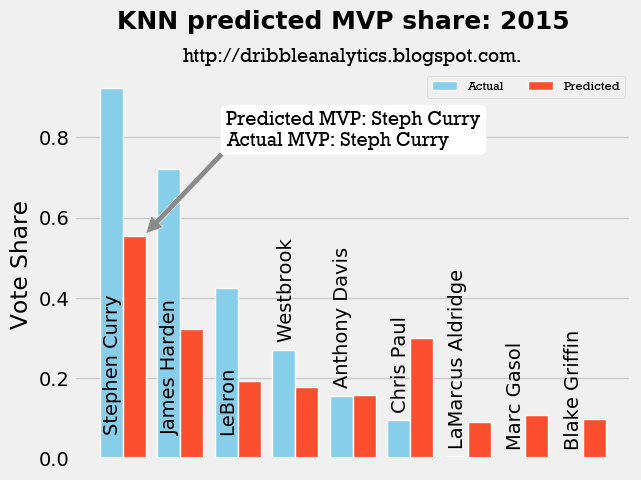

In [139]:
plt.style.use('fivethirtyeight')

knn15, ax = plt.subplots()

ax.bar(x_knn, df15.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn15.suptitle("KNN predicted MVP share: 2015", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.56), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn15.savefig('knn-15.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [140]:
dnnPredict15 = dnn.predict(df15Predict)
dnnPredict15 = dnnPredict15.tolist()

for (i, j) in zip(df15Names, dnnPredict15):
    print(i, j)

Stephen Curry 0.4622588085701034
James Harden 0.5721418187901006
LeBron 0.21732181426401073
Westbrook 0.2263249372917284
Anthony Davis 0.13530298056014597
Chris Paul 0.38584677535067313
LaMarcus Aldridge 0.04510765918239443
Marc Gasol 0.06402853946082462
Blake Griffin 0.12358429288523418


In [141]:
dnnList = [[i, j] for i, j in zip(df15Names, dnnPredict15)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Stephen Curry', 0.4622588085701034], ['James Harden', 0.5721418187901006], ['LeBron', 0.21732181426401073], ['Westbrook', 0.2263249372917284], ['Anthony Davis', 0.13530298056014597], ['Chris Paul', 0.38584677535067313], ['LaMarcus Aldridge', 0.04510765918239443], ['Marc Gasol', 0.06402853946082462], ['Blake Griffin', 0.12358429288523418]]


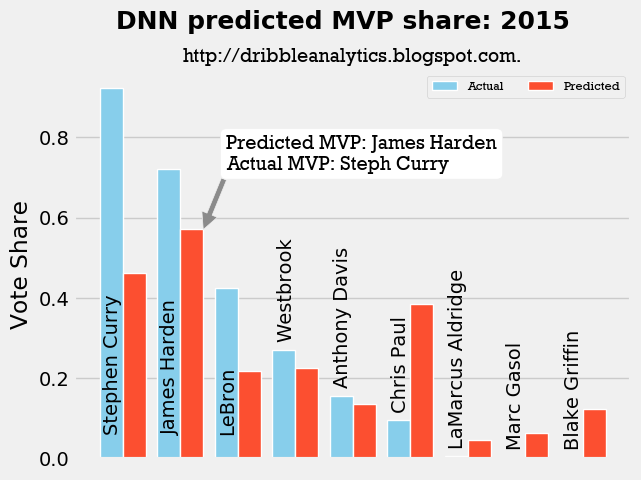

In [142]:
plt.style.use('fivethirtyeight')

dnn15, ax = plt.subplots()

ax.bar(x_dnn, df15.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn15.suptitle("DNN predicted MVP share: 2015", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: Steph Curry", xy = (1.6, 0.57), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn15.savefig('dnn-15.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.5699809230436874, 0.4794131137903828, 0.1796586678707479, 0.17994844665558524, 0.1610667200321855, 0.34372850884551287, 0.046598369947762584, 0.05390724539256481, 0.07767652285951362]


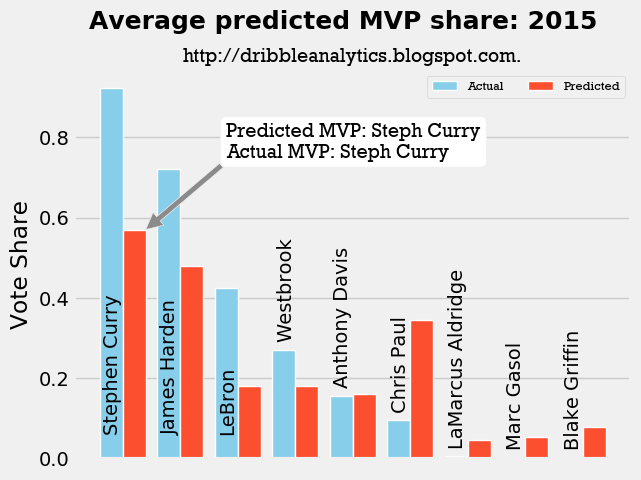

In [143]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg15, ax = plt.subplots()

ax.bar(x_avg, df15.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df15Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg15.suptitle("Average predicted MVP share: 2015", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.57), xycoords = 'data', xytext = (2, .75),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg15.savefig('avg-15.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2016

In [144]:
df16 = pd.read_csv('16-mvp.csv')
df16Names = df16.iloc[:, 1]
df16Predict = df16[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df16.head()

Rank         Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  Stephen Curry   27  GSW     1310     1310  1.000  79         73   
1     2          Kawhi   24  SAS      634     1310  0.484  72         67   
2     3         LeBron   31  CLE      631     1310  0.482  76         57   
3     4      Westbrook   27  OKC      486     1310  0.371  80         55   
4     5   Kevin Durant   27  OKC      147     1310  0.112  72         55   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.454  0.908  17.9  0.318   9.8  12.5   
1             2      ...       0.443  0.874  13.7  0.277   6.2   8.3   
2             3      ...       0.309  0.731  13.6  0.242   7.6   9.1   
3             5      ...       0.296  0.812  14.0  0.245   8.3  10.0   
4             5      ...       0.387  0.898  14.5  0.270   6.4   7.9   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [145]:
svrPredict16 = svr.predict(df16Predict)
svrPredict16 = svrPredict16.tolist()

for (i, j) in zip(df16Names, svrPredict16):
    print(i, j)

Stephen Curry 0.9469626239379643
Kawhi 0.28704590919073847
LeBron 0.35372437672322543
Westbrook 0.3611967614603617
Kevin Durant 0.35021457996903815
Chris Paul 0.12196728299368575
Draymond Green 0.3387234695656136
Damian Lillard -0.030369281036217943
James Harden 0.1697617186065219
Kyle Lowry 0.13306371049913568


In [146]:
svrList = [[i, j] for i, j in zip(df16Names, svrPredict16)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Stephen Curry', 0.9469626239379643], ['Kawhi', 0.28704590919073847], ['LeBron', 0.35372437672322543], ['Westbrook', 0.3611967614603617], ['Kevin Durant', 0.35021457996903815], ['Chris Paul', 0.12196728299368575], ['Draymond Green', 0.3387234695656136], ['Damian Lillard', -0.030369281036217943], ['James Harden', 0.1697617186065219], ['Kyle Lowry', 0.13306371049913568]]


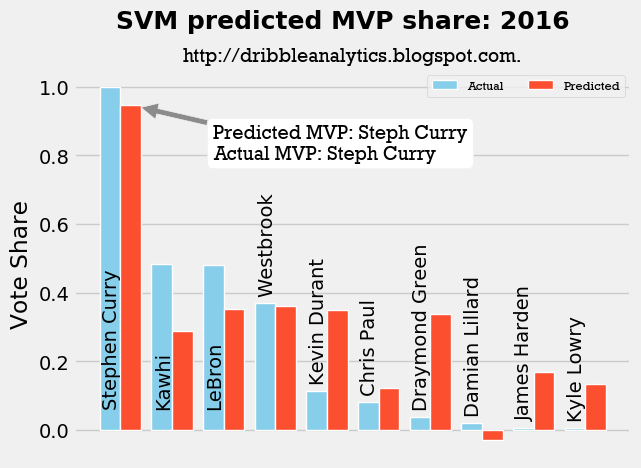

In [147]:
plt.style.use('fivethirtyeight')

svr16, ax = plt.subplots()

ax.bar(x_svr, df16.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr16.suptitle("SVM predicted MVP share: 2016", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.94), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr16.savefig('svr-16.png', dpi = 400, bbox_inches = 'tight')

## RF

In [148]:
rfPredict16 = rf.predict(df16Predict)
rfPredict16 = rfPredict16.tolist()

for (i, j) in zip(df16Names, rfPredict16):
    print(i, j)

Stephen Curry 0.8739999999999994
Kawhi 0.4466700000000003
LeBron 0.4060900000000003
Westbrook 0.3169000000000002
Kevin Durant 0.2680999999999999
Chris Paul 0.22214999999999996
Draymond Green 0.08196999999999999
Damian Lillard 0.10433000000000002
James Harden 0.1820099999999999
Kyle Lowry 0.11853999999999995


In [149]:
rfList = [[i, j] for i, j in zip(df16Names, rfPredict16)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Stephen Curry', 0.8739999999999994], ['Kawhi', 0.4466700000000003], ['LeBron', 0.4060900000000003], ['Westbrook', 0.3169000000000002], ['Kevin Durant', 0.2680999999999999], ['Chris Paul', 0.22214999999999996], ['Draymond Green', 0.08196999999999999], ['Damian Lillard', 0.10433000000000002], ['James Harden', 0.1820099999999999], ['Kyle Lowry', 0.11853999999999995]]


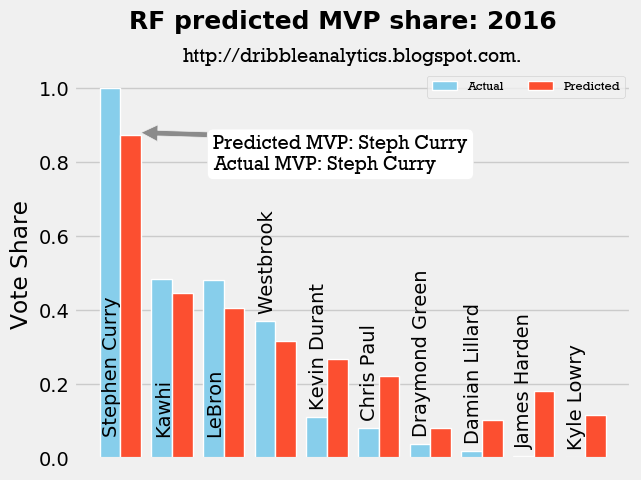

In [150]:
plt.style.use('fivethirtyeight')

rf16, ax = plt.subplots()

ax.bar(x_rf, df16.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf16.suptitle("RF predicted MVP share: 2016", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.88), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf16.savefig('rf-16.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [151]:
knnPredict16 = knn.predict(df16Predict)
knnPredict16 = knnPredict16.tolist()
knnPredict16 = [row[0] for row in knnPredict16]
for (i, j) in zip(df16Names, knnPredict16):
    print(i, j)

Stephen Curry 0.9146666666666667
Kawhi 0.3718333333333333
LeBron 0.3085
Westbrook 0.2889999999999999
Kevin Durant 0.3668333333333333
Chris Paul 0.1521666666666667
Draymond Green 0.042333333333333334
Damian Lillard 0.1385
James Harden 0.10516666666666667
Kyle Lowry 0.1485


In [152]:
knnList = [[i, j] for i, j in zip(df16Names, knnPredict16)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Stephen Curry', 0.9146666666666667], ['Kawhi', 0.3718333333333333], ['LeBron', 0.3085], ['Westbrook', 0.2889999999999999], ['Kevin Durant', 0.3668333333333333], ['Chris Paul', 0.1521666666666667], ['Draymond Green', 0.042333333333333334], ['Damian Lillard', 0.1385], ['James Harden', 0.10516666666666667], ['Kyle Lowry', 0.1485]]


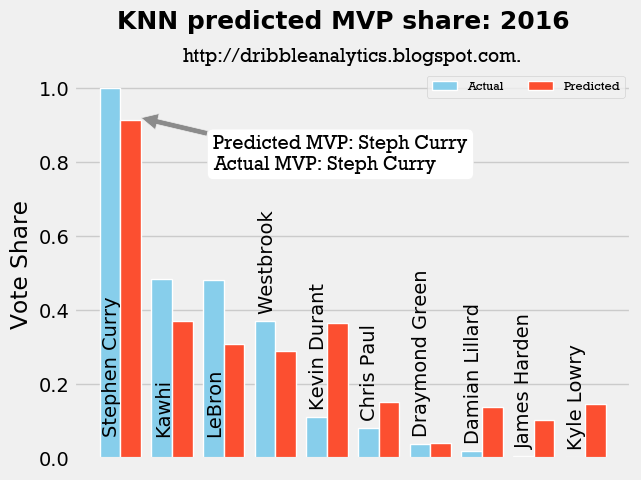

In [153]:
plt.style.use('fivethirtyeight')

knn16, ax = plt.subplots()

ax.bar(x_knn, df16.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn16.suptitle("KNN predicted MVP share: 2016", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.92), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn16.savefig('knn-16.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [154]:
dnnPredict16 = dnn.predict(df16Predict)
dnnPredict16 = dnnPredict16.tolist()

for (i, j) in zip(df16Names, dnnPredict16):
    print(i, j)

Stephen Curry 0.682996400109414
Kawhi 0.18272092893442402
LeBron 0.40226959707876087
Westbrook 0.5038733612249453
Kevin Durant 0.437124206882771
Chris Paul 0.2127408917077129
Draymond Green 0.27999762058428934
Damian Lillard 0.08985621485832926
James Harden 0.2754832539568237
Kyle Lowry 0.20509344829841744


In [155]:
dnnList = [[i, j] for i, j in zip(df16Names, dnnPredict16)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Stephen Curry', 0.682996400109414], ['Kawhi', 0.18272092893442402], ['LeBron', 0.40226959707876087], ['Westbrook', 0.5038733612249453], ['Kevin Durant', 0.437124206882771], ['Chris Paul', 0.2127408917077129], ['Draymond Green', 0.27999762058428934], ['Damian Lillard', 0.08985621485832926], ['James Harden', 0.2754832539568237], ['Kyle Lowry', 0.20509344829841744]]


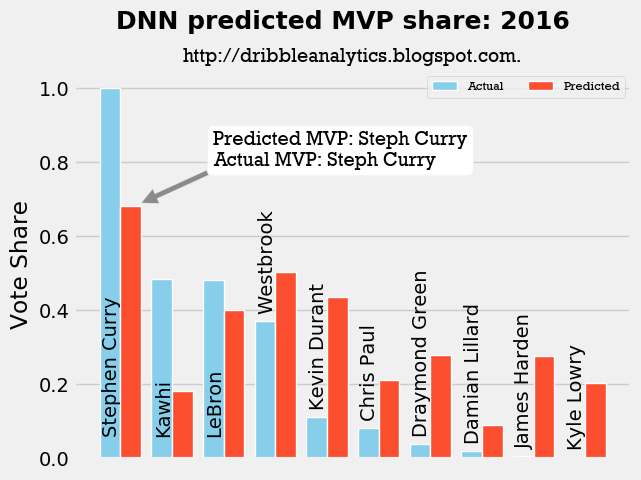

In [156]:
plt.style.use('fivethirtyeight')

dnn16, ax = plt.subplots()

ax.bar(x_dnn, df16.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn16.suptitle("DNN predicted MVP share: 2016", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.69), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn16.savefig('dnn-16.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.8546564226785112, 0.322067542864624, 0.36764599345049664, 0.3677425306713268, 0.35556803004628557, 0.17725621034201633, 0.18575610587080907, 0.07557923345552783, 0.18310540980750306, 0.15129928969938827]


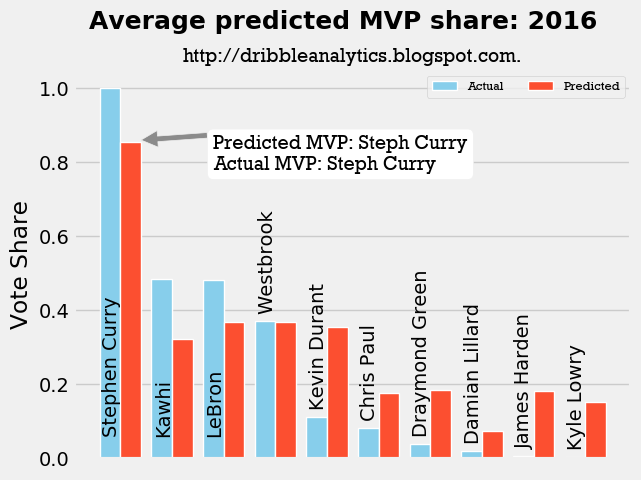

In [157]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg16, ax = plt.subplots()

ax.bar(x_avg, df16.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df16Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg16.suptitle("Average predicted MVP share: 2016", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Steph Curry", xy = (.6, 0.86), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg16.savefig('avg-16.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2017

In [158]:
df17 = pd.read_csv('17-mvp.csv')
df17Names = df17.iloc[:, 1]
df17Predict = df17[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df17.head()

Rank             Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1  Russell Westbrook   28  OKC      888     1010  0.879  81         47   
1     2       James Harden   27  HOU      753     1010  0.746  81         55   
2     3      Kawhi Leonard   25  SAS      500     1010  0.495  74         61   
3     4             LeBron   32  CLE      333     1010  0.330  74         51   
4     5      Isaiah Thomas   27  BOS       81     1010  0.080  76         53   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0            10      ...       0.343  0.845  13.1  0.224  12.4  15.6   
1             3      ...       0.347  0.847  15.0  0.245   9.0  10.1   
2             2      ...       0.380  0.880  13.6  0.264   6.2   7.9   
3             5      ...       0.363  0.674  12.9  0.221   7.3   8.4   
4             4      ...       0.379  0.909  12.5  0.234   4.8   5.4   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [159]:
svrPredict17 = svr.predict(df17Predict)
svrPredict17 = svrPredict17.tolist()

for (i, j) in zip(df17Names, svrPredict17):
    print(i, j)

Russell Westbrook 0.46644707873620805
James Harden 0.601829397866674
Kawhi Leonard 0.28953334200685066
LeBron 0.33409867270714666
Isaiah Thomas 0.20245037674183197
Stephen Curry 0.4057627999510476
Giannis Antetokounmpo 0.0655890051282888
John Wall 0.061137957621023586
Anthony Davis 0.05606177490942943
Kevin Durant 0.3573019105138744


In [160]:
svrList = [[i, j] for i, j in zip(df17Names, svrPredict17)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['Russell Westbrook', 0.46644707873620805], ['James Harden', 0.601829397866674], ['Kawhi Leonard', 0.28953334200685066], ['LeBron', 0.33409867270714666], ['Isaiah Thomas', 0.20245037674183197], ['Stephen Curry', 0.4057627999510476], ['Giannis Antetokounmpo', 0.0655890051282888], ['John Wall', 0.061137957621023586], ['Anthony Davis', 0.05606177490942943], ['Kevin Durant', 0.3573019105138744]]


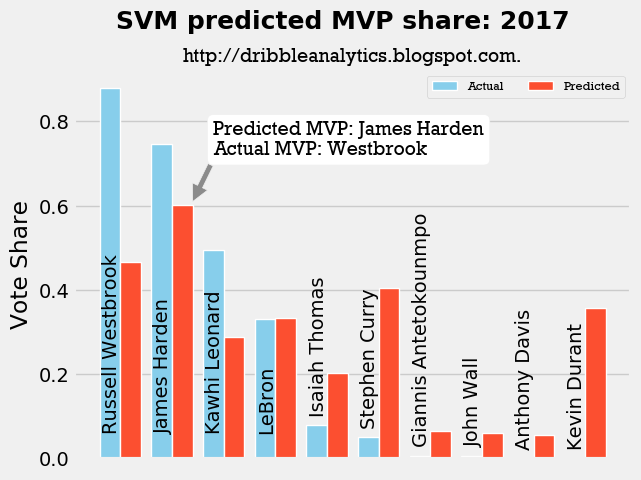

In [161]:
plt.style.use('fivethirtyeight')

svr17, ax = plt.subplots()

ax.bar(x_svr, df17.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr17.suptitle("SVM predicted MVP share: 2017", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: Westbrook", xy = (1.6, 0.61), xycoords = 'data', xytext = (2, .72),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr17.savefig('svr-17.png', dpi = 400, bbox_inches = 'tight')

## RF

In [162]:
rfPredict17 = rf.predict(df17Predict)
rfPredict17 = rfPredict17.tolist()

for (i, j) in zip(df17Names, rfPredict17):
    print(i, j)

Russell Westbrook 0.37915000000000026
James Harden 0.4327900000000004
Kawhi Leonard 0.3957400000000002
LeBron 0.25015
Isaiah Thomas 0.36312000000000016
Stephen Curry 0.3797800000000002
Giannis Antetokounmpo 0.15007999999999996
John Wall 0.08524999999999996
Anthony Davis 0.17352
Kevin Durant 0.39421000000000034


In [163]:
rfList = [[i, j] for i, j in zip(df17Names, rfPredict17)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['Russell Westbrook', 0.37915000000000026], ['James Harden', 0.4327900000000004], ['Kawhi Leonard', 0.3957400000000002], ['LeBron', 0.25015], ['Isaiah Thomas', 0.36312000000000016], ['Stephen Curry', 0.3797800000000002], ['Giannis Antetokounmpo', 0.15007999999999996], ['John Wall', 0.08524999999999996], ['Anthony Davis', 0.17352], ['Kevin Durant', 0.39421000000000034]]


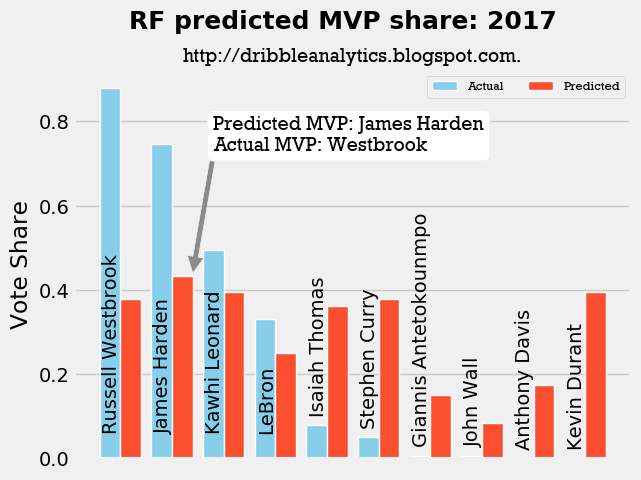

In [164]:
plt.style.use('fivethirtyeight')

rf17, ax = plt.subplots()

ax.bar(x_rf, df17.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf17.suptitle("RF predicted MVP share: 2017", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: Westbrook", xy = (1.6, 0.44), xycoords = 'data', xytext = (2, .73),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf17.savefig('rf-17.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [165]:
knnPredict17 = knn.predict(df17Predict)
knnPredict17 = knnPredict17.tolist()
knnPredict17 = [row[0] for row in knnPredict17]
for (i, j) in zip(df17Names, knnPredict17):
    print(i, j)

Russell Westbrook 0.34349999999999997
James Harden 0.34149999999999997
Kawhi Leonard 0.328
LeBron 0.23199999999999998
Isaiah Thomas 0.17499999999999996
Stephen Curry 0.34800000000000003
Giannis Antetokounmpo 0.09849999999999999
John Wall 0.0695
Anthony Davis 0.05383333333333334
Kevin Durant 0.2245


In [166]:
knnList = [[i, j] for i, j in zip(df17Names, knnPredict17)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['Russell Westbrook', 0.34349999999999997], ['James Harden', 0.34149999999999997], ['Kawhi Leonard', 0.328], ['LeBron', 0.23199999999999998], ['Isaiah Thomas', 0.17499999999999996], ['Stephen Curry', 0.34800000000000003], ['Giannis Antetokounmpo', 0.09849999999999999], ['John Wall', 0.0695], ['Anthony Davis', 0.05383333333333334], ['Kevin Durant', 0.2245]]


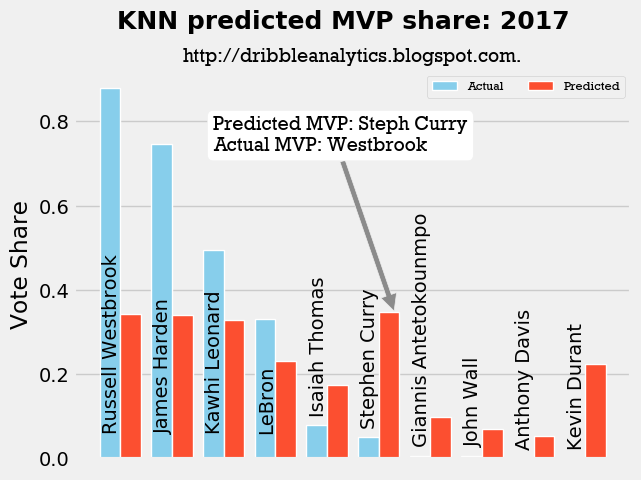

In [167]:
plt.style.use('fivethirtyeight')

knn17, ax = plt.subplots()

ax.bar(x_knn, df17.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn17.suptitle("KNN predicted MVP share: 2017", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: Steph Curry\nActual MVP: Westbrook", xy = (5.5, 0.35), xycoords = 'data', xytext = (2, .73),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn17.savefig('knn-17.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [168]:
dnnPredict17 = dnn.predict(df17Predict)
dnnPredict17 = dnnPredict17.tolist()

for (i, j) in zip(df17Names, dnnPredict17):
    print(i, j)

Russell Westbrook 0.6864158779823144
James Harden 0.7925442862319103
Kawhi Leonard 0.27985377057899696
LeBron 0.4043476455370827
Isaiah Thomas 0.341886430600004
Stephen Curry 0.39388654792416555
Giannis Antetokounmpo 0.07595139117773161
John Wall 0.16495597096724499
Anthony Davis -0.05056170585459732
Kevin Durant 0.3539559920578268


In [169]:
dnnList = [[i, j] for i, j in zip(df17Names, dnnPredict17)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['Russell Westbrook', 0.6864158779823144], ['James Harden', 0.7925442862319103], ['Kawhi Leonard', 0.27985377057899696], ['LeBron', 0.4043476455370827], ['Isaiah Thomas', 0.341886430600004], ['Stephen Curry', 0.39388654792416555], ['Giannis Antetokounmpo', 0.07595139117773161], ['John Wall', 0.16495597096724499], ['Anthony Davis', -0.05056170585459732], ['Kevin Durant', 0.3539559920578268]]


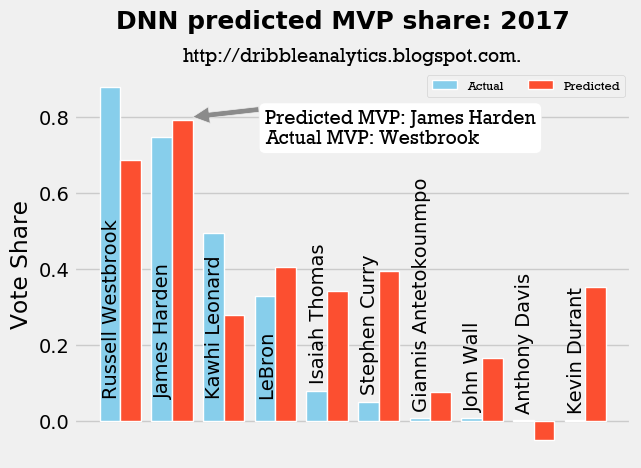

In [170]:
plt.style.use('fivethirtyeight')

dnn17, ax = plt.subplots()

ax.bar(x_dnn, df17.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn17.suptitle("DNN predicted MVP share: 2017", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: Westbrook", xy = (1.6, 0.8), xycoords = 'data', xytext = (3, .73),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn17.savefig('dnn-17.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.4688782391796307, 0.5421659210246461, 0.323281778146462, 0.3051490795610573, 0.27061420183545903, 0.38185733696880336, 0.09753009907650509, 0.09521098214706714, 0.058213350597041365, 0.33249197564292543]


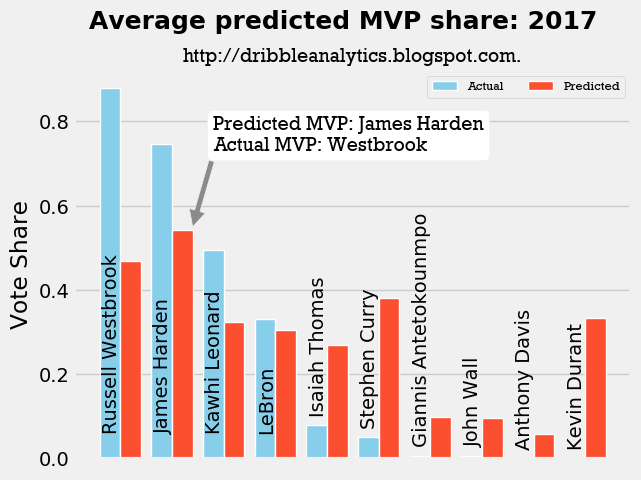

In [171]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg17, ax = plt.subplots()

ax.bar(x_avg, df17.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df17Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 3:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 3:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg17.suptitle("Average predicted MVP share: 2017", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: Westbrook", xy = (1.6, 0.55), xycoords = 'data', xytext = (2, .73),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg17.savefig('avg-17.png', dpi = 400, bbox_inches = 'tight')

# Predictions: 2018

In [172]:
df18 = pd.read_csv('18-mvp.csv')
df18Names = df18.iloc[:, 1]
df18Predict = df18[['G', 'MP', 'Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%',  'WS', 'VORP', 'BPM']]

df18.head()

Rank             Player  Age   Tm  Pts Won  Pts Max  Share   G  Team Wins  \
0     1       James Harden   28  HOU      965     1010  0.955  72         65   
1     2             LeBron   33  CLE      738     1010  0.731  82         50   
2     3              Davis   24  NOP      445     1010  0.441  75         48   
3     4     Damian Lillard   27  POR      207     1010  0.205  73         49   
4     5  Russell Westbrook   29  OKC       76     1010  0.075  80         48   

   Overall Seed      ...         3P%    FT%    WS  WS/48  VORP   BPM  \
0             1      ...       0.367  0.858  15.4  0.289   8.3  10.9   
1             6      ...       0.367  0.731  14.0  0.221   8.9   9.6   
2             9      ...       0.340  0.828  13.7  0.241   4.9   5.2   
3             7      ...       0.361  0.916  12.6  0.227   5.9   6.7   
4            10      ...       0.298  0.737  10.1  0.166   7.5   8.2   

   G-Lockout  Wins-Lockout  WS-Lockout  VORP-Lockout  
0        NaN           NaN         NaN           NaN  
1        NaN           NaN         NaN           NaN  
2        NaN           NaN         NaN           NaN  
3        NaN           NaN         NaN           NaN  
4        NaN           NaN         NaN           NaN  

[5 rows x 27 columns]

## SVR 

In [173]:
svrPredict18 = svr.predict(df18Predict)
svrPredict18 = svrPredict18.tolist()

for (i, j) in zip(df18Names, svrPredict18):
    print(i, j)

James Harden 0.7020482295977082
LeBron 0.4056243827949213
Davis 0.21670841616746972
Damian Lillard 0.1701281096177183
Russell Westbrook 0.1997724454049148
Giannis 0.0879060798319784
Kevin Durant 0.1982010727651502
DeMar DeRozan 0.06854504228787017
LaMarcus Aldridge -0.07037705347919432
Jimmy Butler -0.08460036291859052
Stephen Curry 0.08360530971008795


In [174]:
svrList = [[i, j] for i, j in zip(df18Names, svrPredict18)]

svrListData = [row[1] for row in svrList]
svrListNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrListData))

[['James Harden', 0.7020482295977082], ['LeBron', 0.4056243827949213], ['Davis', 0.21670841616746972], ['Damian Lillard', 0.1701281096177183], ['Russell Westbrook', 0.1997724454049148], ['Giannis', 0.0879060798319784], ['Kevin Durant', 0.1982010727651502], ['DeMar DeRozan', 0.06854504228787017], ['LaMarcus Aldridge', -0.07037705347919432], ['Jimmy Butler', -0.08460036291859052], ['Stephen Curry', 0.08360530971008795]]


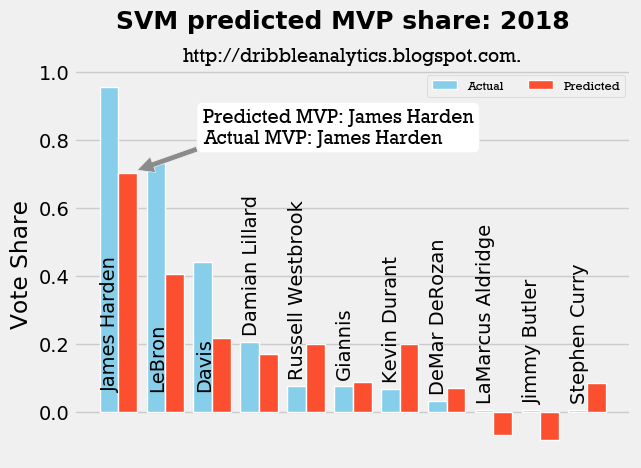

In [175]:
plt.style.use('fivethirtyeight')

svr18, ax = plt.subplots()

ax.bar(x_svr, df18.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_svr + 0.4, svrListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = svrListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
svr18.suptitle("SVM predicted MVP share: 2018", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: James Harden", xy = (.6, 0.71), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

svr18.savefig('svr-18.png', dpi = 400, bbox_inches = 'tight')

## RF

In [176]:
rfPredict18 = rf.predict(df18Predict)
rfPredict18 = rfPredict18.tolist()

for (i, j) in zip(df18Names, rfPredict18):
    print(i, j)

James Harden 0.6356600000000004
LeBron 0.22171000000000007
Davis 0.21281999999999987
Damian Lillard 0.24488000000000004
Russell Westbrook 0.19319999999999993
Giannis 0.12664999999999998
Kevin Durant 0.2069899999999999
DeMar DeRozan 0.08137999999999998
LaMarcus Aldridge 0.1178699999999999
Jimmy Butler 0.041849999999999984
Stephen Curry 0.2568999999999999


In [177]:
rfList = [[i, j] for i, j in zip(df18Names, rfPredict18)]

rfListData = [row[1] for row in rfList]
rfListNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfListData))

[['James Harden', 0.6356600000000004], ['LeBron', 0.22171000000000007], ['Davis', 0.21281999999999987], ['Damian Lillard', 0.24488000000000004], ['Russell Westbrook', 0.19319999999999993], ['Giannis', 0.12664999999999998], ['Kevin Durant', 0.2069899999999999], ['DeMar DeRozan', 0.08137999999999998], ['LaMarcus Aldridge', 0.1178699999999999], ['Jimmy Butler', 0.041849999999999984], ['Stephen Curry', 0.2568999999999999]]


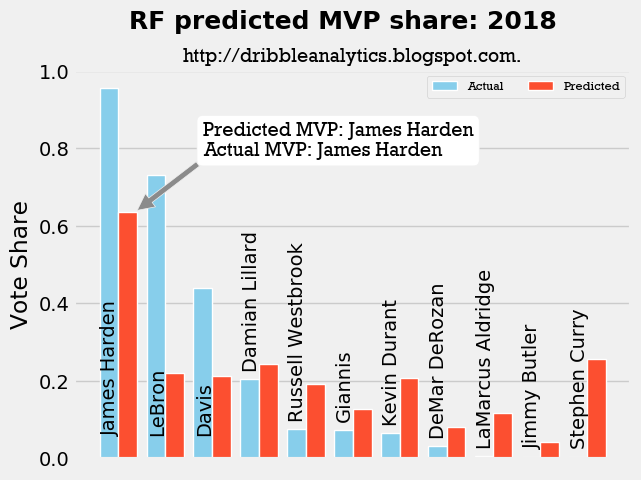

In [178]:
plt.style.use('fivethirtyeight')

rf18, ax = plt.subplots()

ax.bar(x_rf, df18.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_rf + 0.4, rfListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = rfListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf18.suptitle("RF predicted MVP share: 2018", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: James Harden", xy = (.6, 0.64), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

rf18.savefig('rf-18.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [179]:
knnPredict18 = knn.predict(df18Predict)
knnPredict18 = knnPredict18.tolist()
knnPredict18 = [row[0] for row in knnPredict18]
for (i, j) in zip(df18Names, knnPredict18):
    print(i, j)

James Harden 0.6976666666666665
LeBron 0.321
Davis 0.18533333333333335
Damian Lillard 0.1585
Russell Westbrook 0.13883333333333334
Giannis 0.09800000000000002
Kevin Durant 0.2815
DeMar DeRozan 0.08233333333333336
LaMarcus Aldridge 0.17599999999999996
Jimmy Butler 0.08800000000000001
Stephen Curry 0.06616666666666667


In [180]:
knnList = [[i, j] for i, j in zip(df18Names, knnPredict18)]

knnListData = [row[1] for row in knnList]
knnListNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnListData))

[['James Harden', 0.6976666666666665], ['LeBron', 0.321], ['Davis', 0.18533333333333335], ['Damian Lillard', 0.1585], ['Russell Westbrook', 0.13883333333333334], ['Giannis', 0.09800000000000002], ['Kevin Durant', 0.2815], ['DeMar DeRozan', 0.08233333333333336], ['LaMarcus Aldridge', 0.17599999999999996], ['Jimmy Butler', 0.08800000000000001], ['Stephen Curry', 0.06616666666666667]]


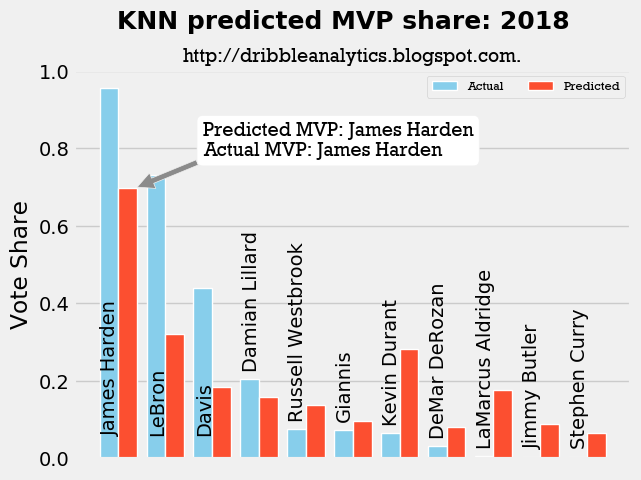

In [181]:
plt.style.use('fivethirtyeight')

knn18, ax = plt.subplots()

ax.bar(x_knn, df18.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_knn + 0.4, knnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = knnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn18.suptitle("KNN predicted MVP share: 2018", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: James Harden", xy = (.6, 0.7), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

knn18.savefig('knn-18.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [182]:
dnnPredict18 = dnn.predict(df18Predict)
dnnPredict18 = dnnPredict18.tolist()

for (i, j) in zip(df18Names, dnnPredict18):
    print(i, j)

James Harden 0.7202064413735891
LeBron 0.49703745981936964
Davis 0.2366015350418562
Damian Lillard 0.3360431417216112
Russell Westbrook 0.3785244735010991
Giannis 0.09990522806293775
Kevin Durant 0.3161283243481081
DeMar DeRozan 0.17202461038318415
LaMarcus Aldridge -0.025732555268510177
Jimmy Butler -0.11440833125479014
Stephen Curry 0.13727453773215068


In [183]:
dnnList = [[i, j] for i, j in zip(df18Names, dnnPredict18)]

dnnListData = [row[1] for row in dnnList]
dnnListNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnListData))

[['James Harden', 0.7202064413735891], ['LeBron', 0.49703745981936964], ['Davis', 0.2366015350418562], ['Damian Lillard', 0.3360431417216112], ['Russell Westbrook', 0.3785244735010991], ['Giannis', 0.09990522806293775], ['Kevin Durant', 0.3161283243481081], ['DeMar DeRozan', 0.17202461038318415], ['LaMarcus Aldridge', -0.025732555268510177], ['Jimmy Butler', -0.11440833125479014], ['Stephen Curry', 0.13727453773215068]]


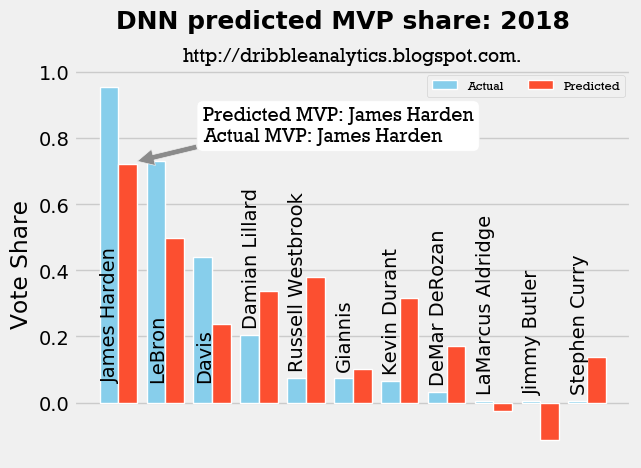

In [184]:
plt.style.use('fivethirtyeight')

dnn18, ax = plt.subplots()

ax.bar(x_dnn, df18.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_dnn + 0.4, dnnListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = dnnListNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn18.suptitle("DNN predicted MVP share: 2018", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: James Harden", xy = (.6, 0.73), xycoords = 'data', xytext = (2, .79),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

dnn18.savefig('dnn-18.png', dpi = 400, bbox_inches = 'tight')

## Average

[0.688895334409491, 0.36134296065357274, 0.2128658211356648, 0.2273878128348324, 0.2275825630598368, 0.10311532697372905, 0.25070484927831455, 0.1010707465010969, 0.04944009781307384, -0.017289673543345166, 0.1359866285272263]


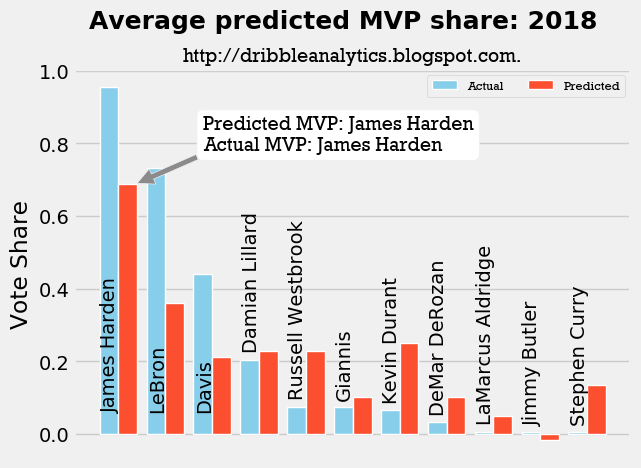

In [185]:
avgListData = []

for (i, j, h, k) in zip(svrListData, rfListData, knnListData, dnnListData):
    avgListData.append(float((i + j + h + k) / 4))
    
print(avgListData)
    
x_avg = np.arange(len(avgListData))

plt.style.use('fivethirtyeight')

avg18, ax = plt.subplots()

ax.bar(x_avg, df18.iloc[:, 6], width = .4, edgecolor = 'white', linewidth = 1, color = 'skyblue', label = 'Actual')
ax.bar(x_avg + 0.4, avgListData, width = .4, edgecolor = 'white', linewidth = 1, color = 'C1', label = 'Predicted')

labels = df18Names

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 2:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 2:
        height = .06
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg18.suptitle("Average predicted MVP share: 2018", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"}, ncol = 2)
an1 = ax.annotate("Predicted MVP: James Harden\nActual MVP: James Harden", xy = (.6, 0.69), xycoords = 'data', xytext = (2, .78),
            fontname = 'Rockwell', bbox=dict(boxstyle="round", fc = 'white'), arrowprops=dict(facecolor = 'C4')
           )

avg18.savefig('avg-18.png', dpi = 400, bbox_inches = 'tight')